# QSRR Prediction Models

### Before execute the code:
 - Decompress multivolume compressed file 'Datasets.7z.001'. Rename resulting directory to 'Datasets'.
 - Decompress compressed file 'RAW_data.7z'.

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import io
from pathlib import Path
import sys


import warnings
warnings.filterwarnings("ignore")

In [2]:
### Basic Directories
# Current directory (code)
cwd = os.getcwd()

# Parent directory (root directory for all folders)
parent = Path(cwd).parent

# Modules directory
modules_dir = os.path.join(cwd,'modules')

# Datasets directory
dsets_dir = os.path.join(parent,'Datasets')

# Evaluation Results Directory
res_dir = os.path.join(parent,'Evaluation_Results')
if not os.path.exists(res_dir):
    os.makedirs(res_dir)

# RAW Data Directory
raw_data_dir = os.path.join(parent,'RAW_data')

# Directory to store collected RAW data
res_raw_dir = os.path.join(res_dir,'Collect_RAW_data')

# Directory to store computed best models and predictions for all datatsets
res_best_models_preds_dir = os.path.join(res_dir,'Best_models_predictions')

# Directory to store various types of Regression-Residuals plots
res_reg_resd_plots_dir = os.path.join(res_dir,'Regression_Residuals_plots')

# Directory to store results for Models performance analysis for various metrics, CC values
res_mod_perf_dir = os.path.join(res_dir,'Models_performance_(matrices_plots)')

# Directory to store results and plots for Statistical Analysis
res_stat_dir = os.path.join(res_dir, 'Statistical_tests')


#----- Include modules' dir into system to import modules
sys.path.insert(0, modules_dir)

In [3]:
### Imports from modules
from Preprocess_datasets import Preprocess_datasets
from Dataset_ML_analysis import Dataset_ML_analysis
from Data_analysis import Data_analysis
from RAW_data import RAW_data

[11:33:12] Enabling RDKit 2019.09.1 jupyter extensions
RDKit WARNING: [11:33:12] Enabling RDKit 2019.09.1 jupyter extensions


### 1. Datasets creation and PreProcessing

In [4]:
### Perform datasets creation and preprocessing
Preprocess_datasets(dsets_dir)

Start calculating MDs for in-house datasets...
	*** DONE ***
Start creatind external-datasets and calculating MDs...


RDKit ERROR: [11:33:21] Explicit valence for atom # 8 N, 4, is greater than permitted
[11:33:21] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [11:33:21] ERROR: Could not sanitize molecule ending on line 28625
[11:33:21] ERROR: Could not sanitize molecule ending on line 28625
RDKit ERROR: [11:33:21] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [11:33:21] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [11:33:21] ERROR: Could not sanitize molecule ending on line 29669
[11:33:21] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
[11:33:21] Explicit valence for atom # 7 N, 4, is greater than permitted
[11:33:21] ERROR: Could not sanitize molecule ending on line 29669
RDKit ERROR: [11:33:21] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[11:33:21] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[11:33:21] Explicit valence for atom # 3 N

	*** DONE ***

Starting preprocess procedure for dataset 'IH_FC_C8'
	Starting filtration procedure with Cor Coef threshold '1'
	Starting filtration procedure with Cor Coef threshold '0.96'
	Starting filtration procedure with Cor Coef threshold '0.9'
	Starting filtration procedure with Cor Coef threshold '0.8'

Starting preprocess procedure for dataset 'IH_LLC_C8'
	Starting filtration procedure with Cor Coef threshold '1'
	Starting filtration procedure with Cor Coef threshold '0.96'
	Starting filtration procedure with Cor Coef threshold '0.9'
	Starting filtration procedure with Cor Coef threshold '0.8'

Starting preprocess procedure for dataset 'SMRT_200'
	Starting filtration procedure with Cor Coef threshold '1'
	Starting filtration procedure with Cor Coef threshold '0.96'
	Starting filtration procedure with Cor Coef threshold '0.9'
	Starting filtration procedure with Cor Coef threshold '0.8'

Starting preprocess procedure for dataset 'SMRT_75'
	Starting filtration procedure with Cor C

### 2. Analyse datasets with selected Machine Learning regression algorithms

In [9]:
### Define a specific dataset name
dset_n = 'SMRT_100'

dset_lnk = os.path.join(dsets_dir, dset_n)
dset = Dataset_ML_analysis(dset_lnk)

#### 2.1 Analyze specific dataset with available ML algorithms

In [10]:
### Set analysis parameters
# Metric to use (only 'MAE' is available)
metric_n = 'MAE'
# Number of predictions cv iterations
pred_splits = 10
# Number of optimization cv iterations
opt_cv = 10
# Number of random parameters sets to examine during optimization
opt_iters = 200
# Number of analysis iterations
n = 1

In [11]:
### Set dataset parameters
# Dataset configuration to be analyzed
# Available choices: 'CC1', 'CC96', 'CC90", "CC80"
cc = 'CC1'

In [12]:
### Methods to be excluded from the analysis
# Available algorithms: 'BayesianRidge', 'SVR_lin', 'SVR_nlin', 'XGBRegressor'
ex_mods = ['SVR_lin', 'SVR_nlin', 'XGBRegressor']

In [13]:
### Perform analysis
# Directory to store results for specific dataset's confguration
dset_store_lnk = os.path.join(raw_data_dir, dset_n, cc, 'Dataset Analysis')
if not os.path.exists(dset_store_lnk):
    os.makedirs(dset_store_lnk)

dset.analyse_datasets(dset_lnk, dset_store_lnk, cc, ex_mods=ex_mods, metric_n=metric_n, pred_splits=pred_splits,
                 opt_cv=opt_cv, opt_iters=opt_iters, n=n)


Round 1 of 1

Starting analysis with method: BayesianRidge (11:35)
Iteration 10 of 10
11:36
        BayesianRidge
R2           0.616547
Adj_R2      -4.423119
Q2           0.616548
MAE         97.767382
MedAE       78.665220
PMAE         0.118589
MSE      15091.629446
RMSE       122.847993
PRMSE       14.652776


### 3. Read RAW experimental data for all datasets

In [14]:
### Perform operation
rd = RAW_data(raw_data_dir, res_raw_dir)

RAW data will be collected for the following 12 datasets
['IH_BA_C18', 'IH_BA_C8', 'IH_FA_C18', 'IH_FA_C8', 'IH_FC_C8', 'IH_LLC_C18', 'IH_LLC_C8', 'SMRT_75', 'SMRT_100', 'SMRT_200', 'SMRT_275', 'SMRT_350']
	Starting dataset IH_BA_C18
	Starting dataset IH_BA_C8
	Starting dataset IH_FA_C18
	Starting dataset IH_FA_C8
	Starting dataset IH_FC_C8
	Starting dataset IH_LLC_C18
	Starting dataset IH_LLC_C8
	Starting dataset SMRT_75
	Starting dataset SMRT_100
	Starting dataset SMRT_200
	Starting dataset SMRT_275
	Starting dataset SMRT_350


#### Store resulting dictionary to pickle file or to separate excel files (one per dataset)

In [15]:
# Directory to store collected RAW data
if not os.path.exists(res_raw_dir):
    os.makedirs(res_raw_dir)

In [16]:
# Store collected RAW data in a pickle file. The whole object is stored
rd_dic_fn = 'All_datasets_raw_data.pickle'
rd_dic_fn_lnk = os.path.join(res_raw_dir, rd_dic_fn)
rd.export_to_file(rd_dic_fn_lnk)


In [17]:
# In the case of excel files, a separate multisheet file is created for each dataset
rd_dic_fn = 'X_raw_data.xlsx'
rd_dic_fn_lnk = os.path.join(res_raw_dir, rd_dic_fn)
rd.export_to_file(rd_dic_fn_lnk)

### 4. Experimental Data Analysis
#### Uses a link to a stored 'RAW_data' object and creates a 'Data_analysis' object<br>

In [18]:
### Create a Data_analysis object based on a stored RAW_data object
rd_obj_fn = 'All_datasets_raw_data.pickle'
rd_obj_fn_lnk = os.path.join(res_raw_dir, rd_obj_fn)

da = Data_analysis(rd_obj_fn_lnk)

#### 4.1 Compute Best Model and Predictions (model's iteration) for all datasets

In [19]:
# Compute best models and predictions for each dataset
da.comp_best_models_and_predictions(rank_type='Median')

#### Store resulting dictionary to a single pickle file or separate excel files (one per dataset)

In [20]:
# Directory to store results for computed best models and predictions
if not os.path.exists(res_best_models_preds_dir):
    os.makedirs(res_best_models_preds_dir)

In [21]:
# Store computed best models and predictions in a pickle file. The whole dictionary is stored
ar_dic_fn = 'All_datasets_best_models_predictions.pickle'
ar_dic_fn_lnk = os.path.join(res_best_models_preds_dir, ar_dic_fn)
da.export_dict_to_file(da.best_models_and_predictions_dic, ar_dic_fn_lnk)

In [22]:
# In the case of excel files, a separate multisheet file is created for each dataset
ar_dic_fn = 'X_best_models_predictions.xlsx'
ar_dic_fn_lnk = os.path.join(res_best_models_preds_dir, ar_dic_fn)
da.export_dictionary_to_file(da.best_models_and_predictions_dic, ar_dic_fn_lnk)

### 4.2 Statistical tests

#### 4.2.1 Collect necessary performance data

In [23]:
# Collect performance data needed for statistical analysis
da.comp_statistical_data()

#### Store resulting dictionary to a single excel file

In [24]:
# Export dict with collected performance values to a multisheet excel file
# Each sheet corresponds to a specific combination of dataset-algorithm-metric
if not os.path.exists(res_stat_dir):
    os.makedirs(res_stat_dir)
store_link = os.path.join(res_stat_dir, 'Collected_metrics_values.xlsx')
da.export_dict_to_file(da.statistical_data_dic, store_link, keep_index=False, kl=2)

#### 4.2.2 Comparative BoxPlots of algorithms' performance values under all conditions

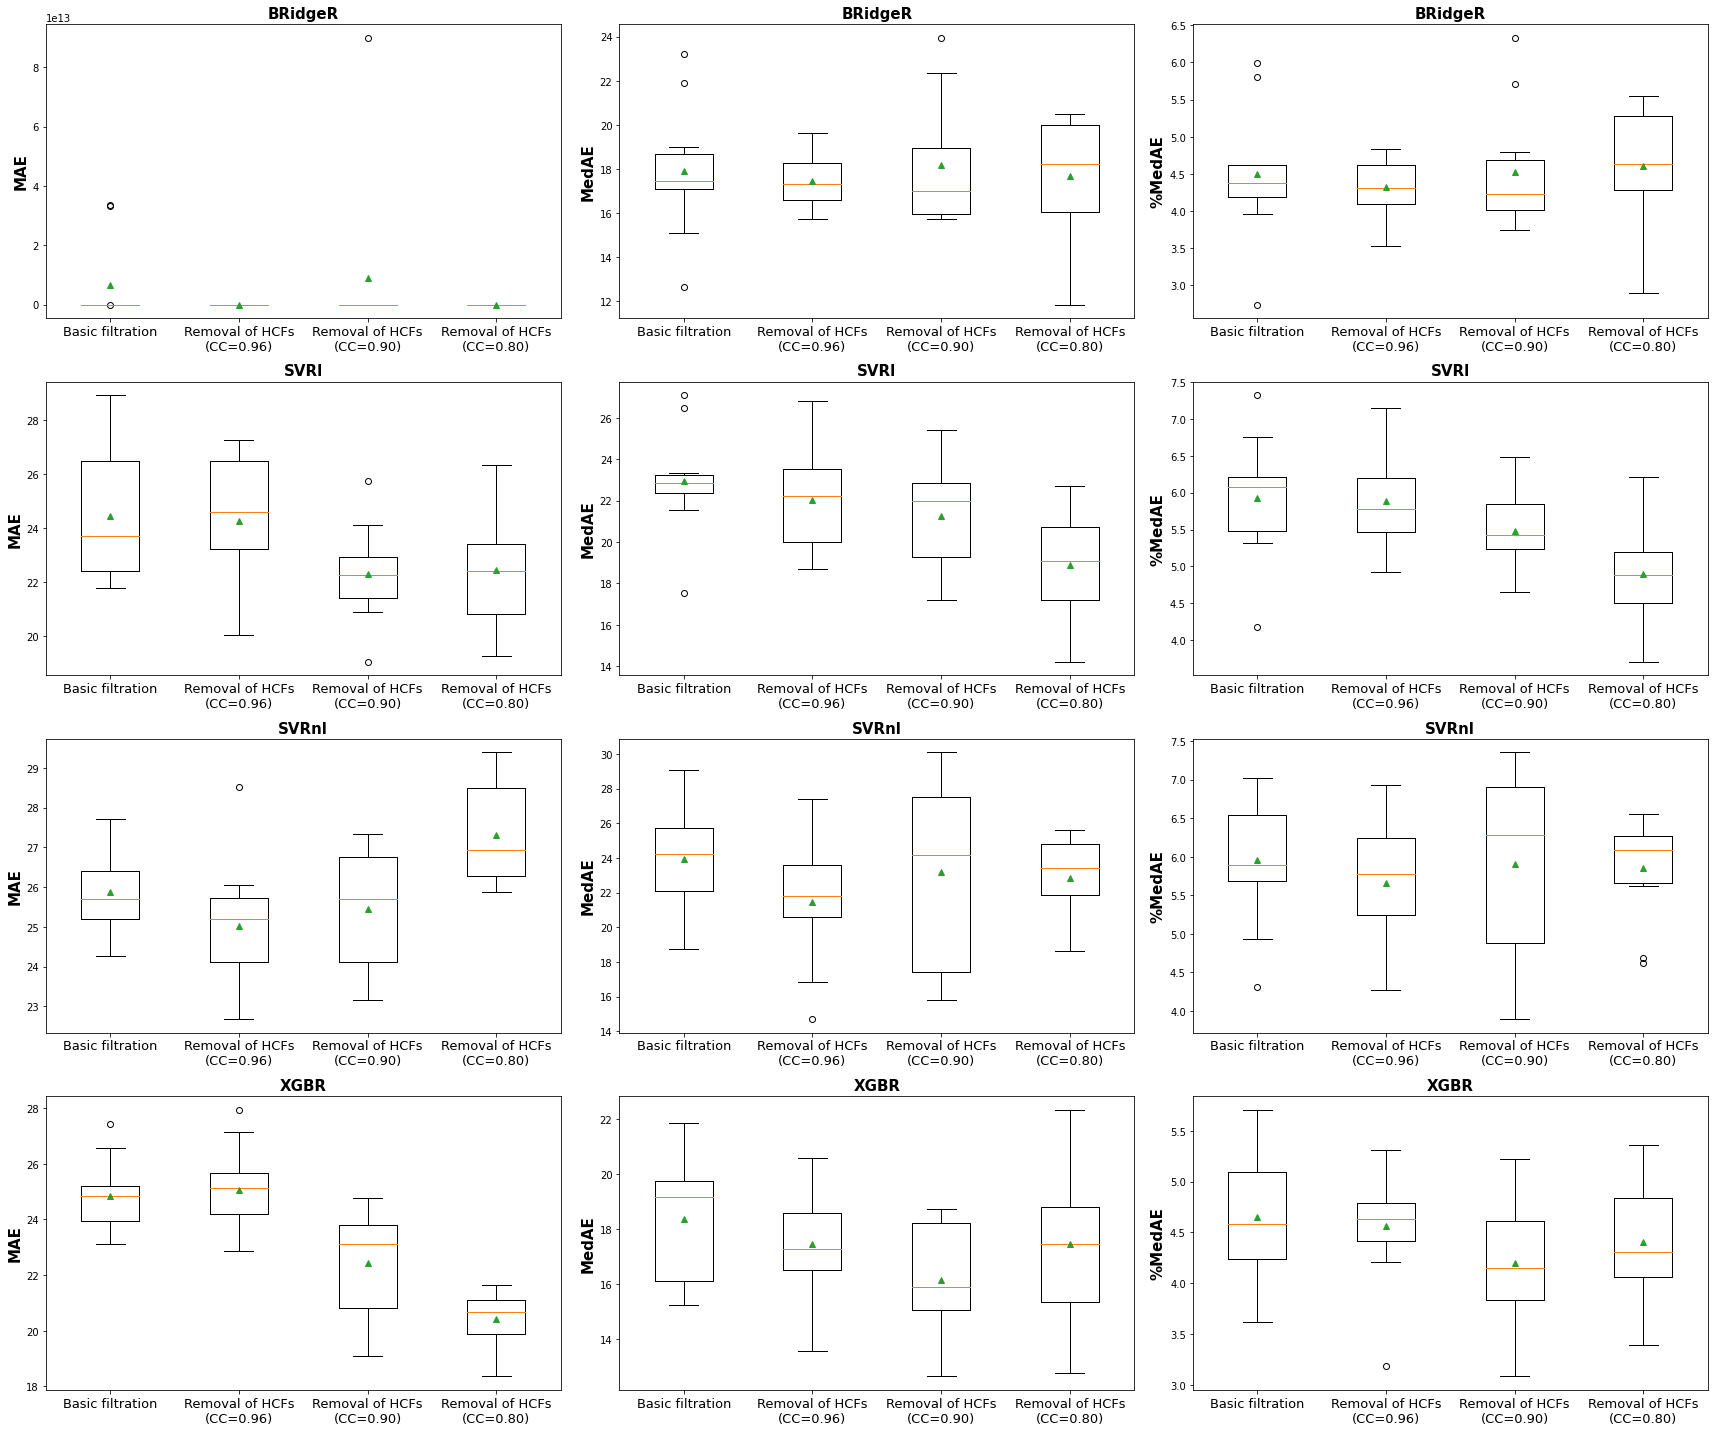

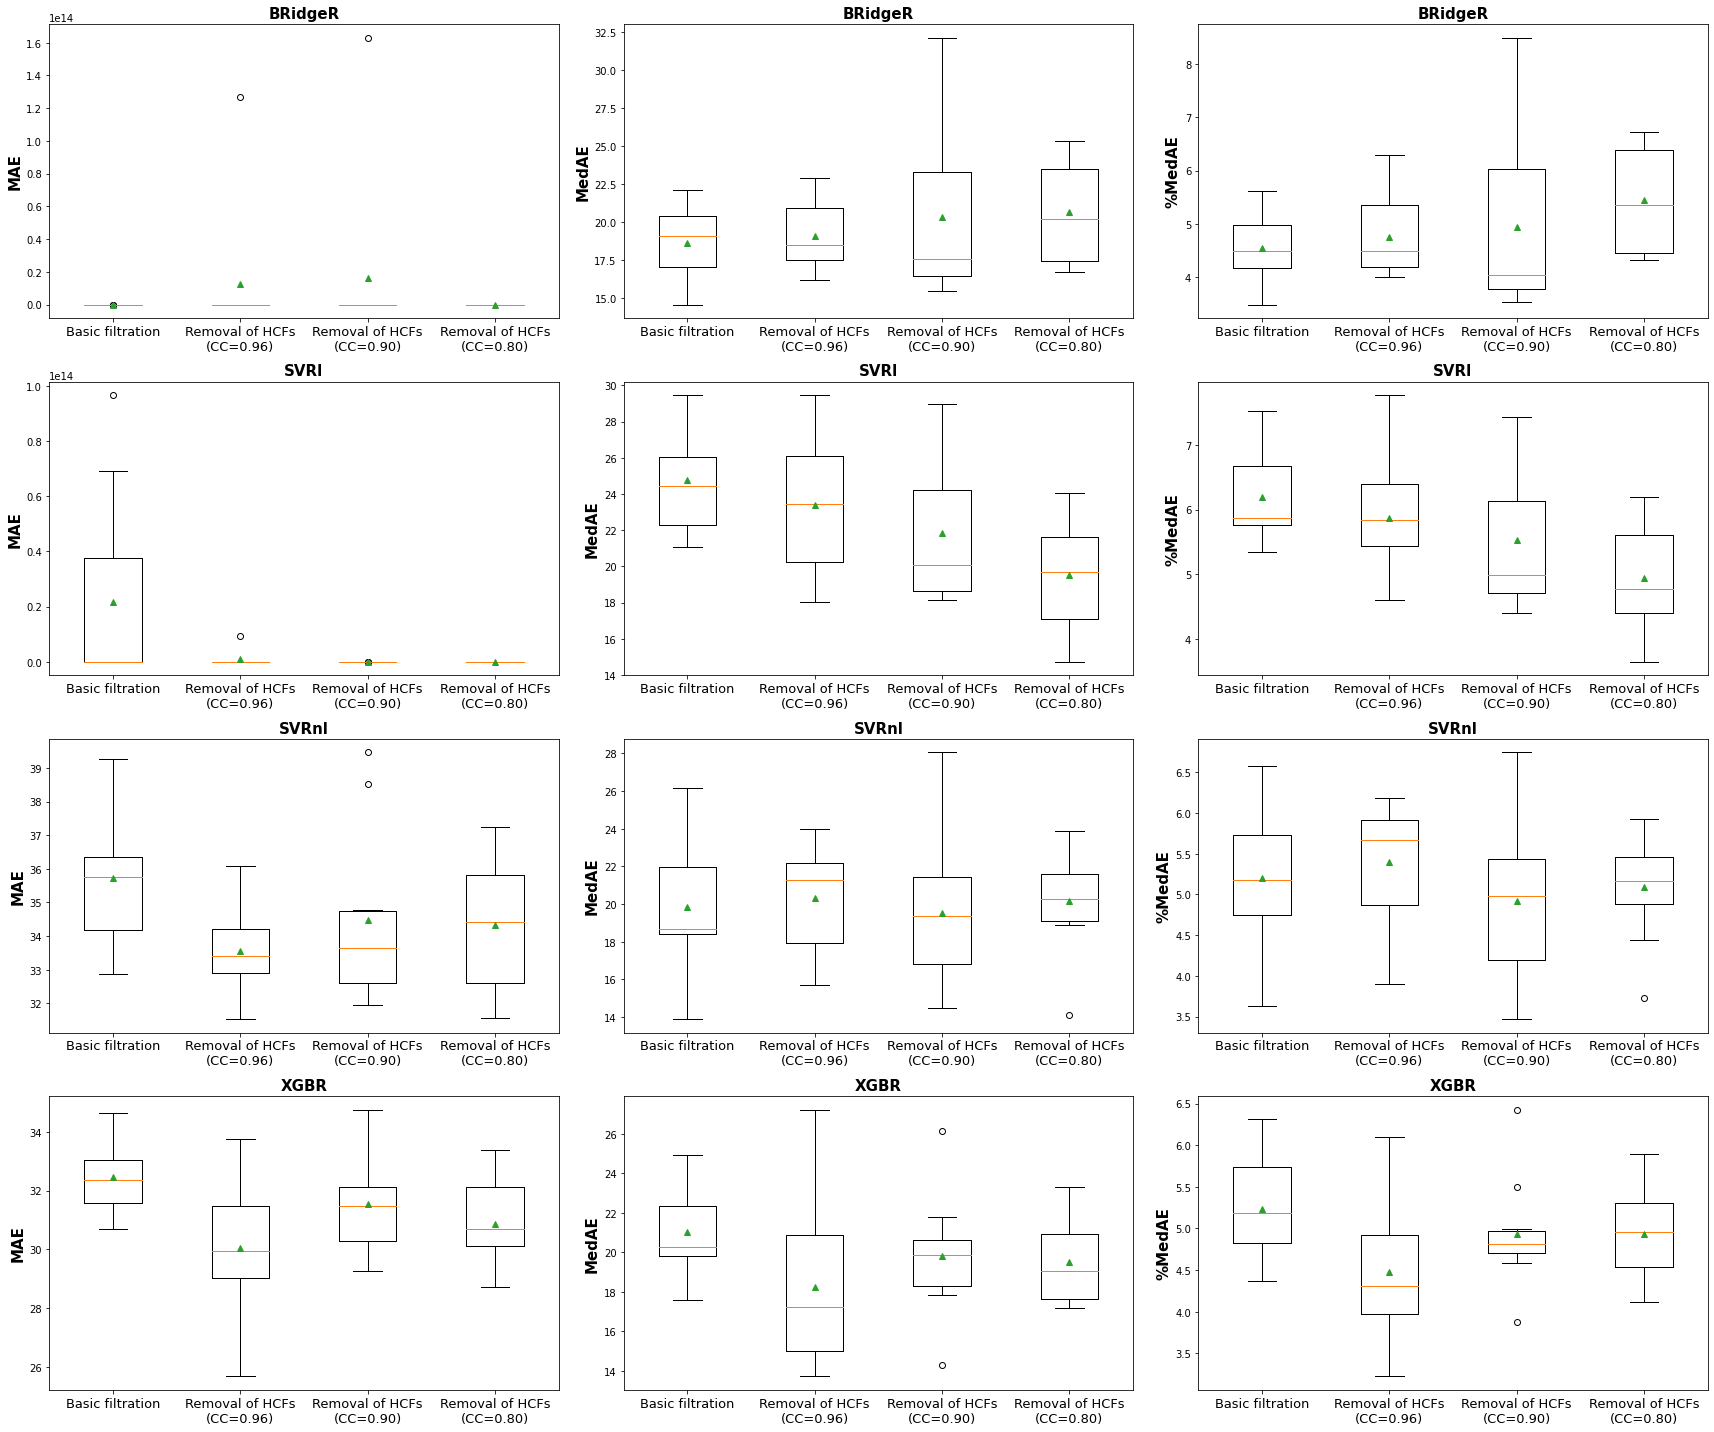

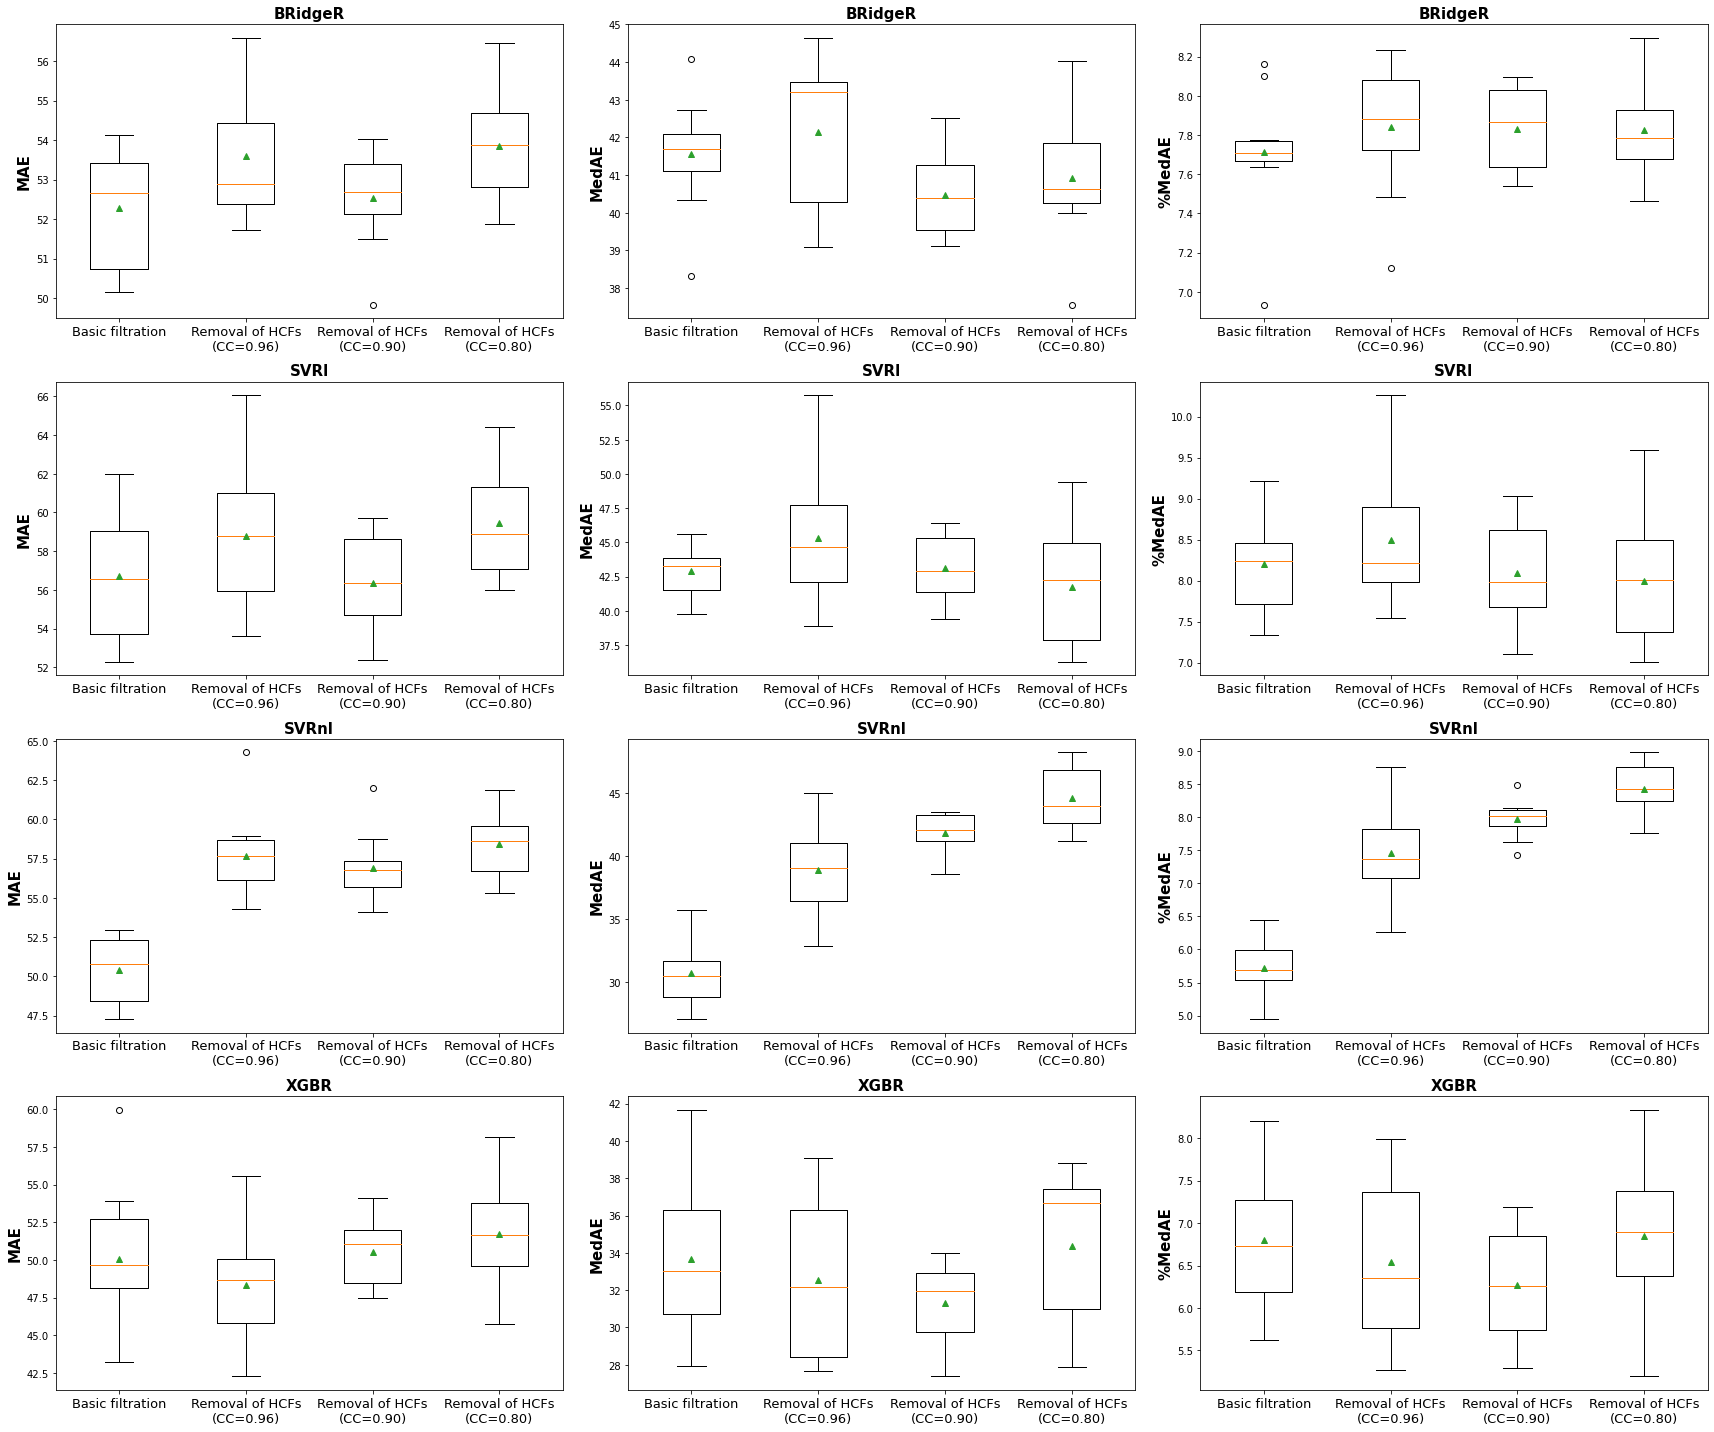

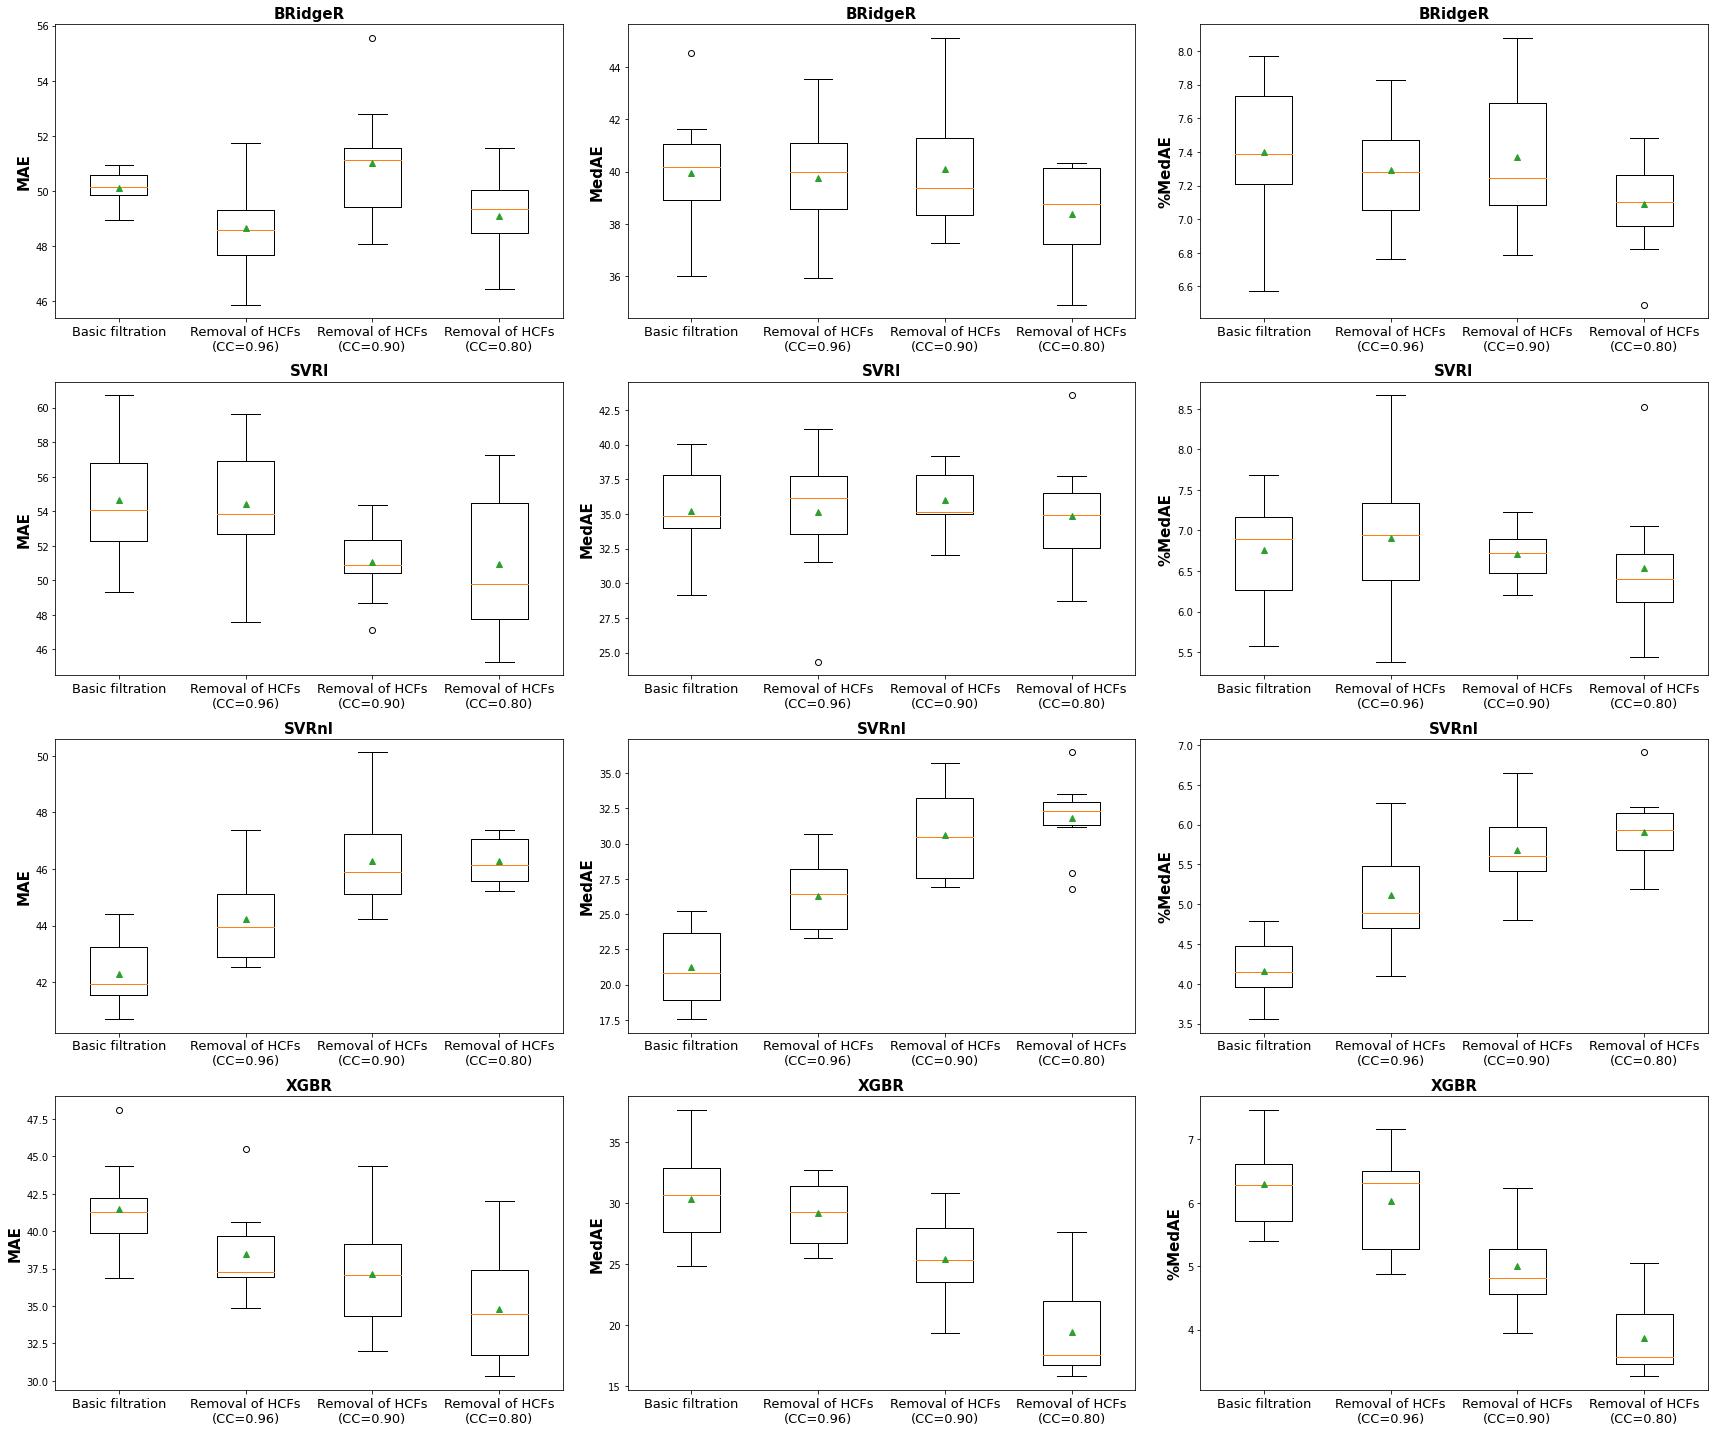

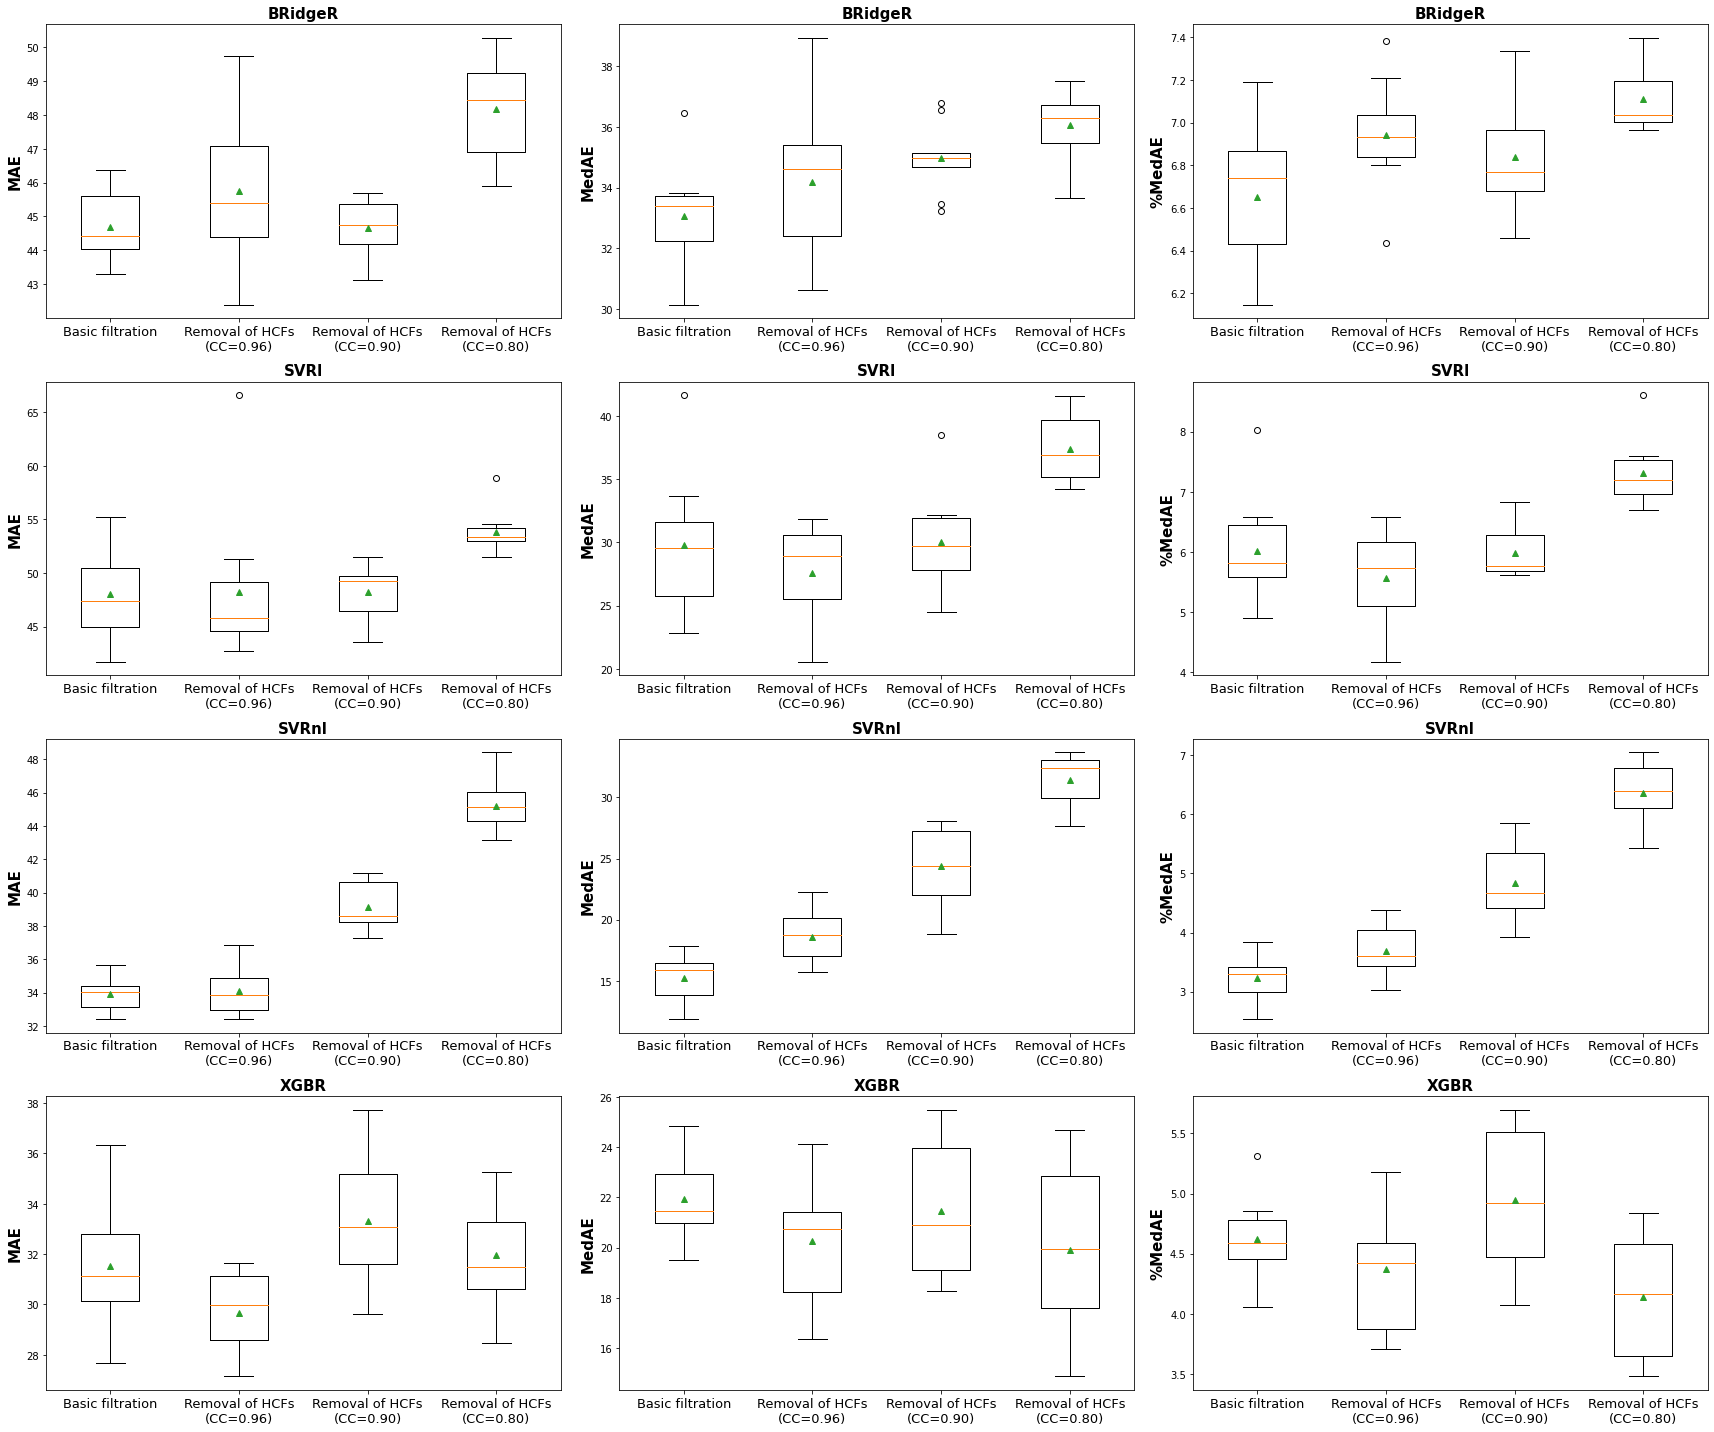

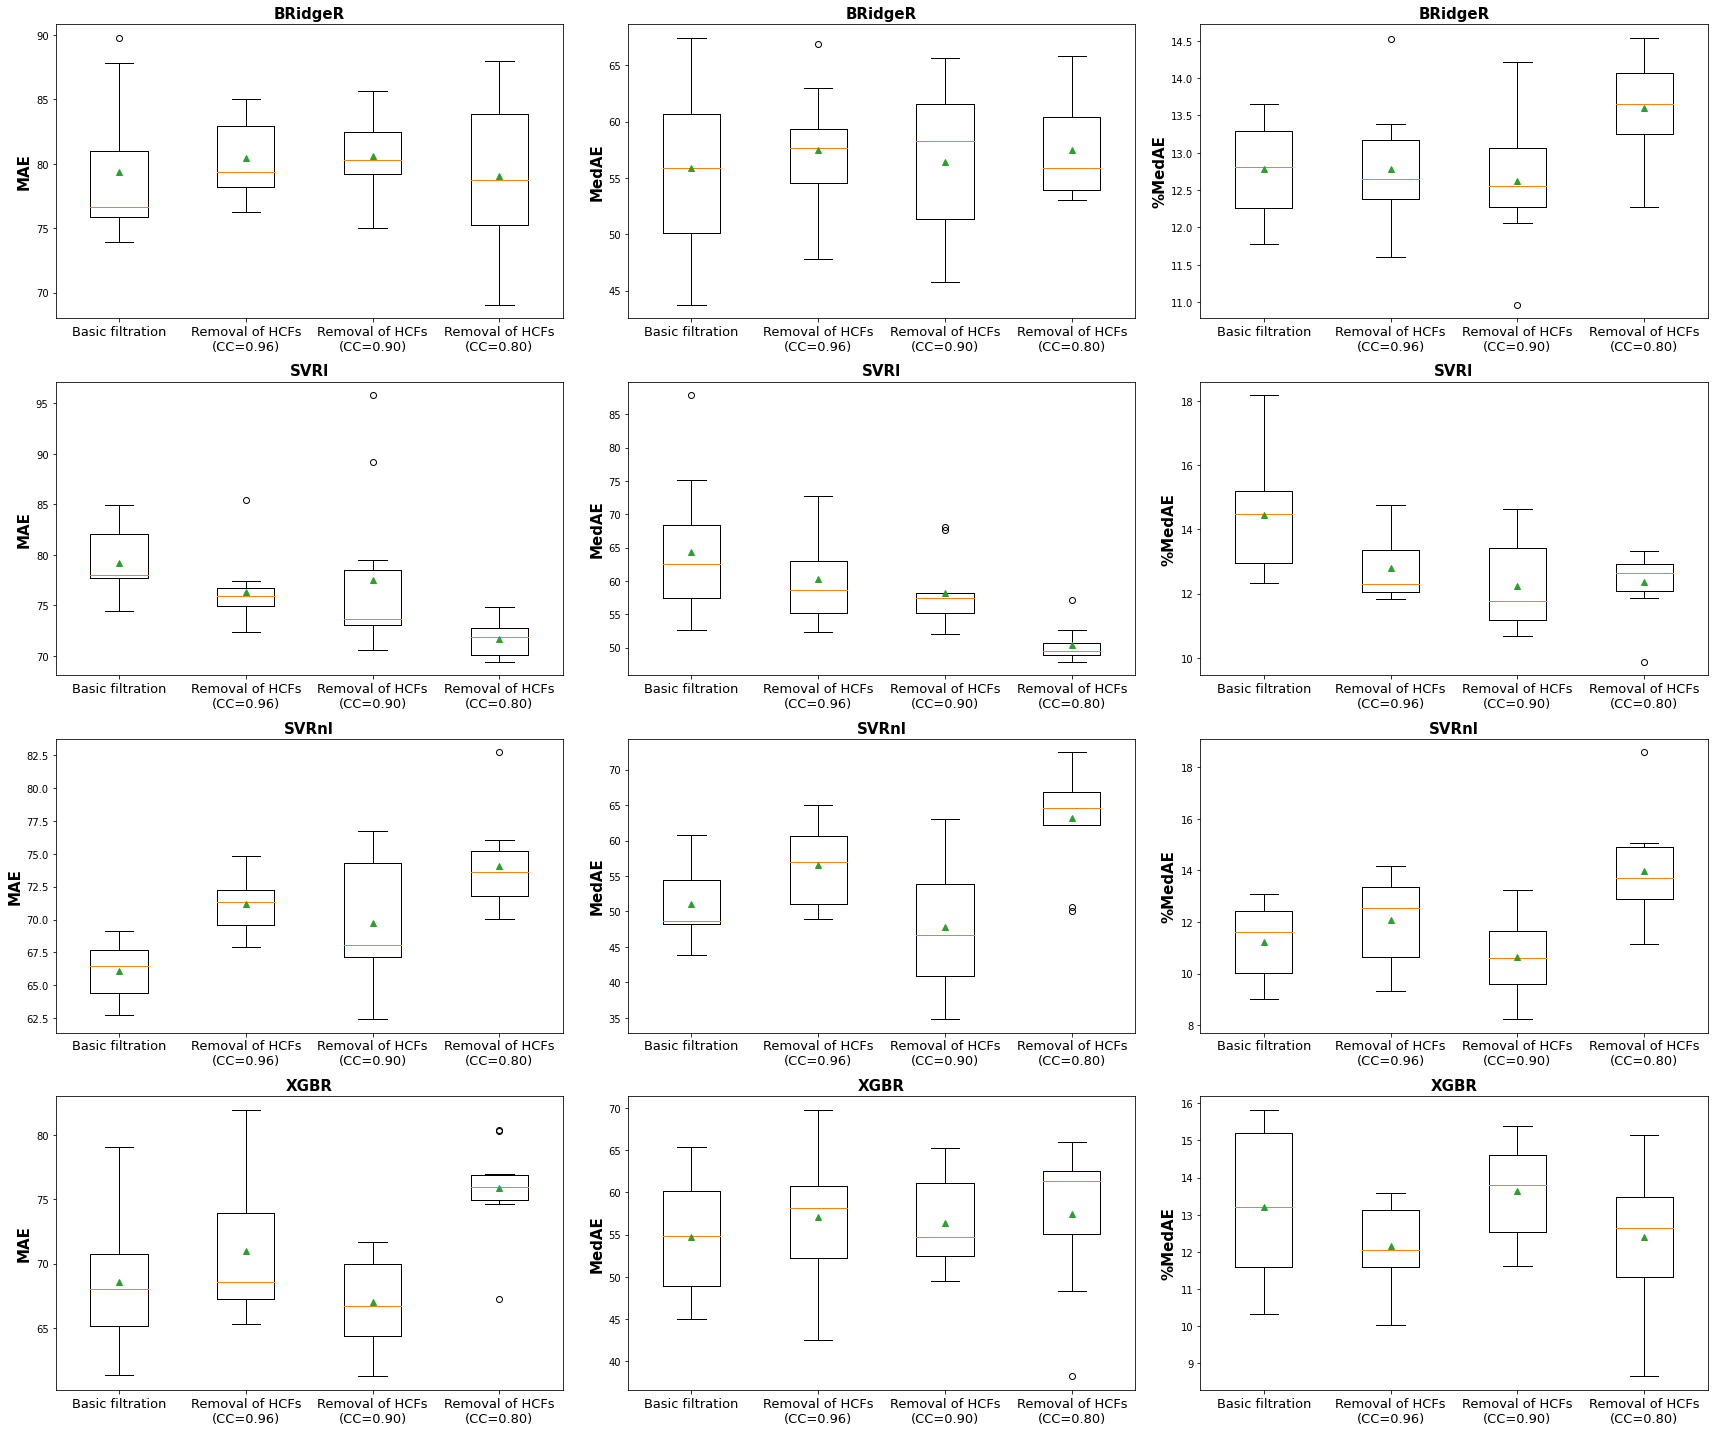

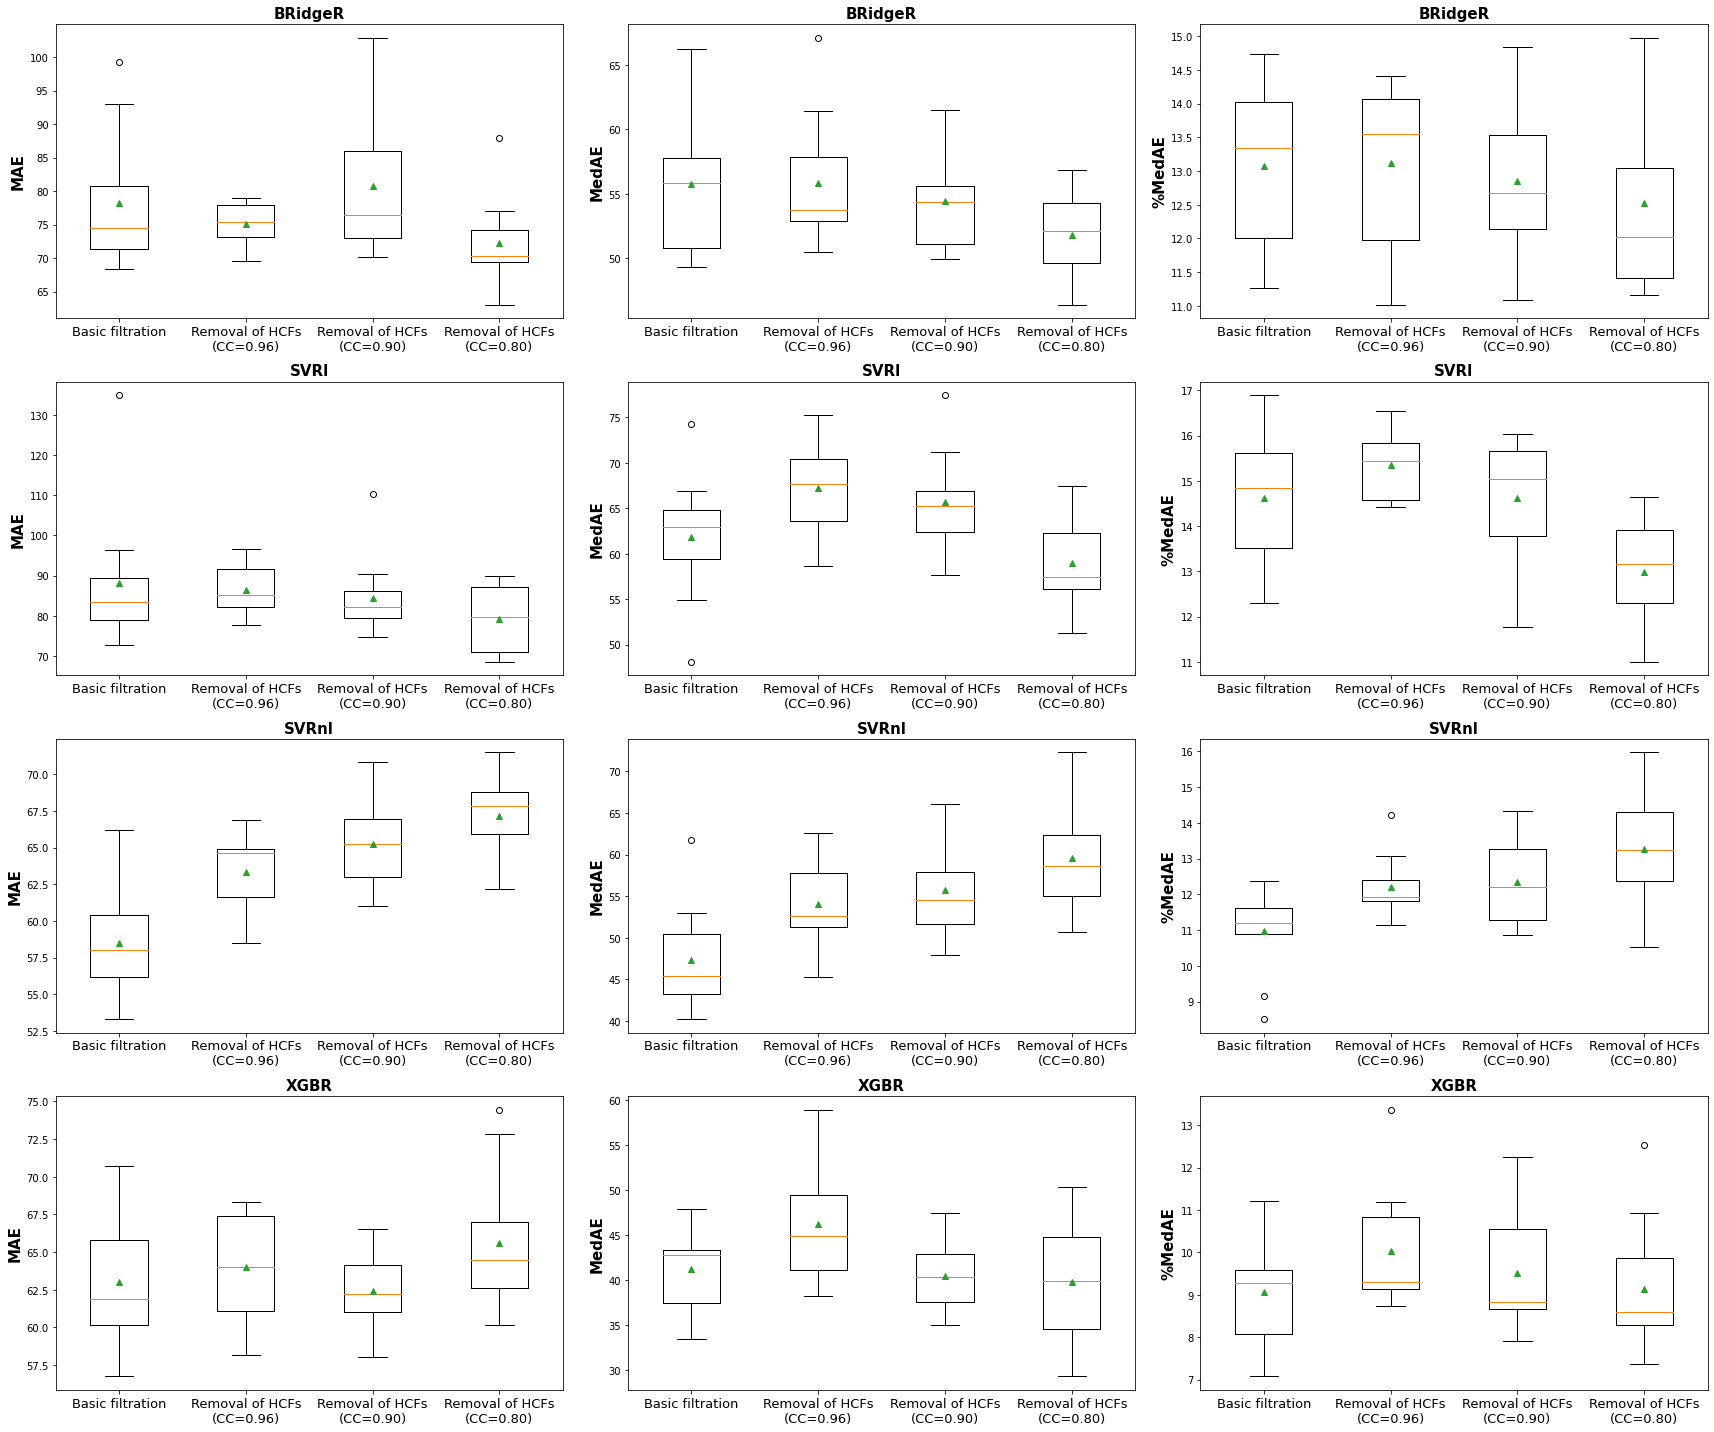

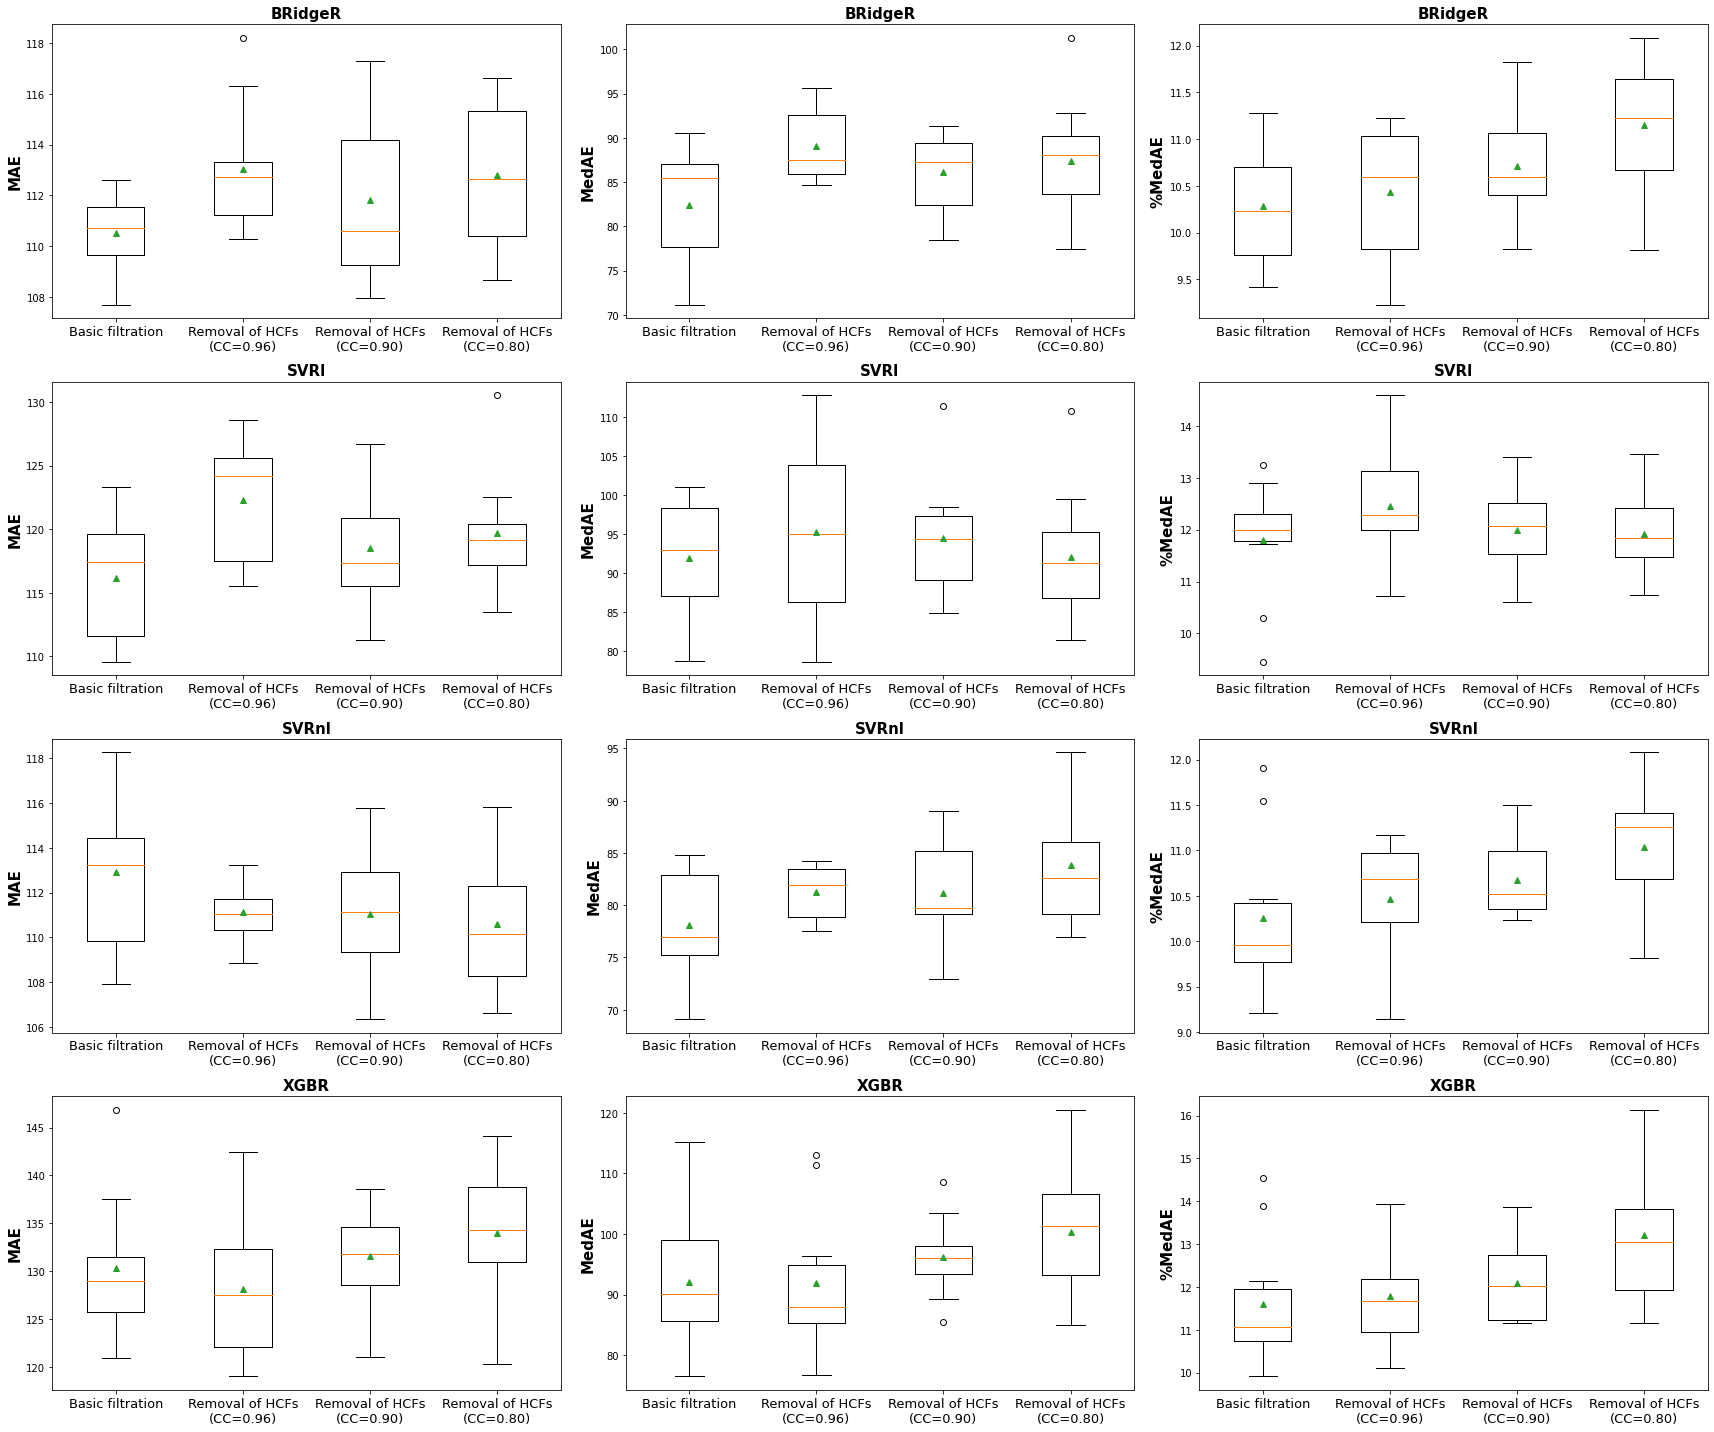

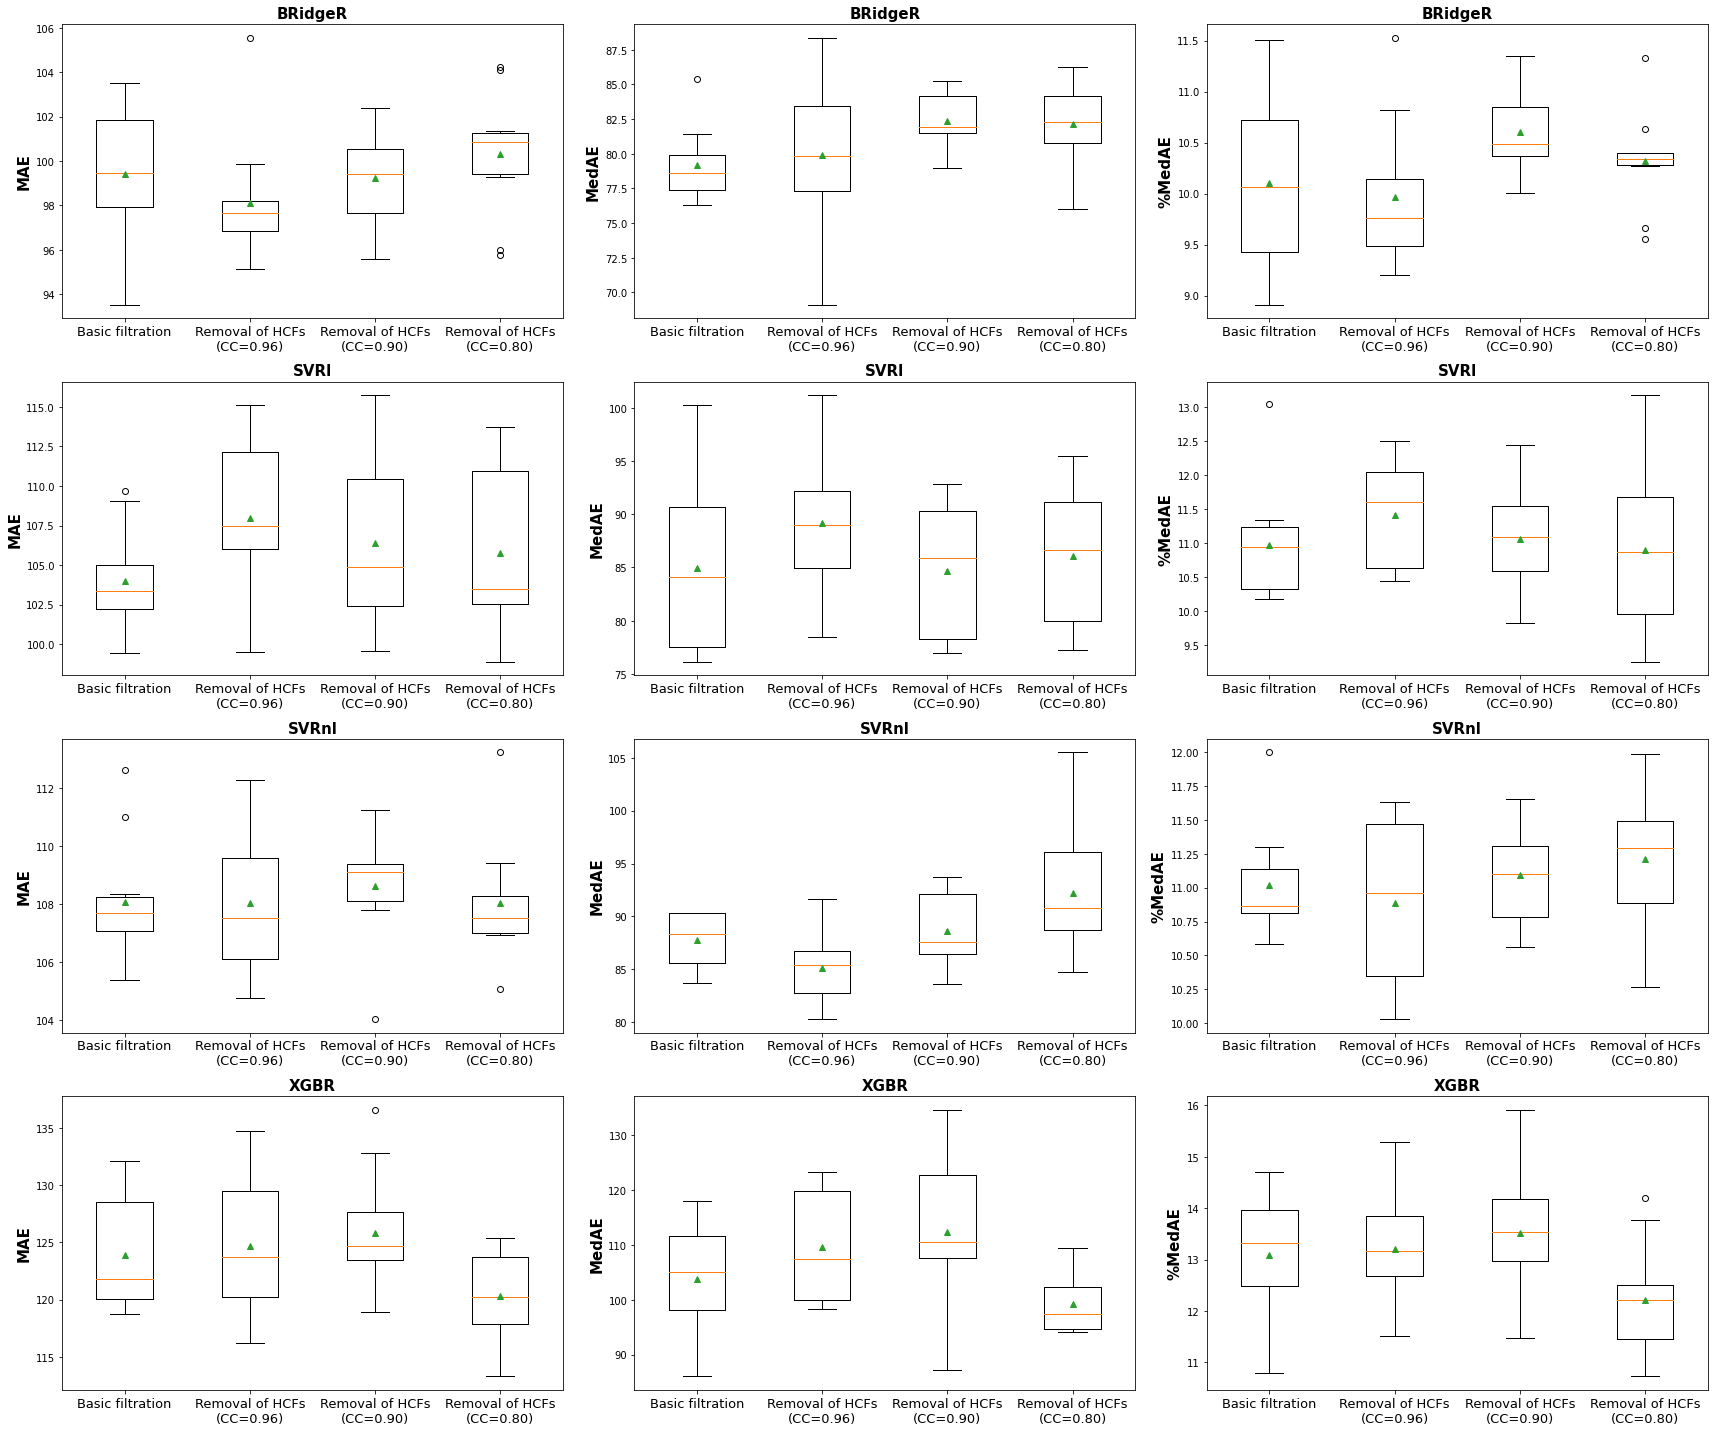

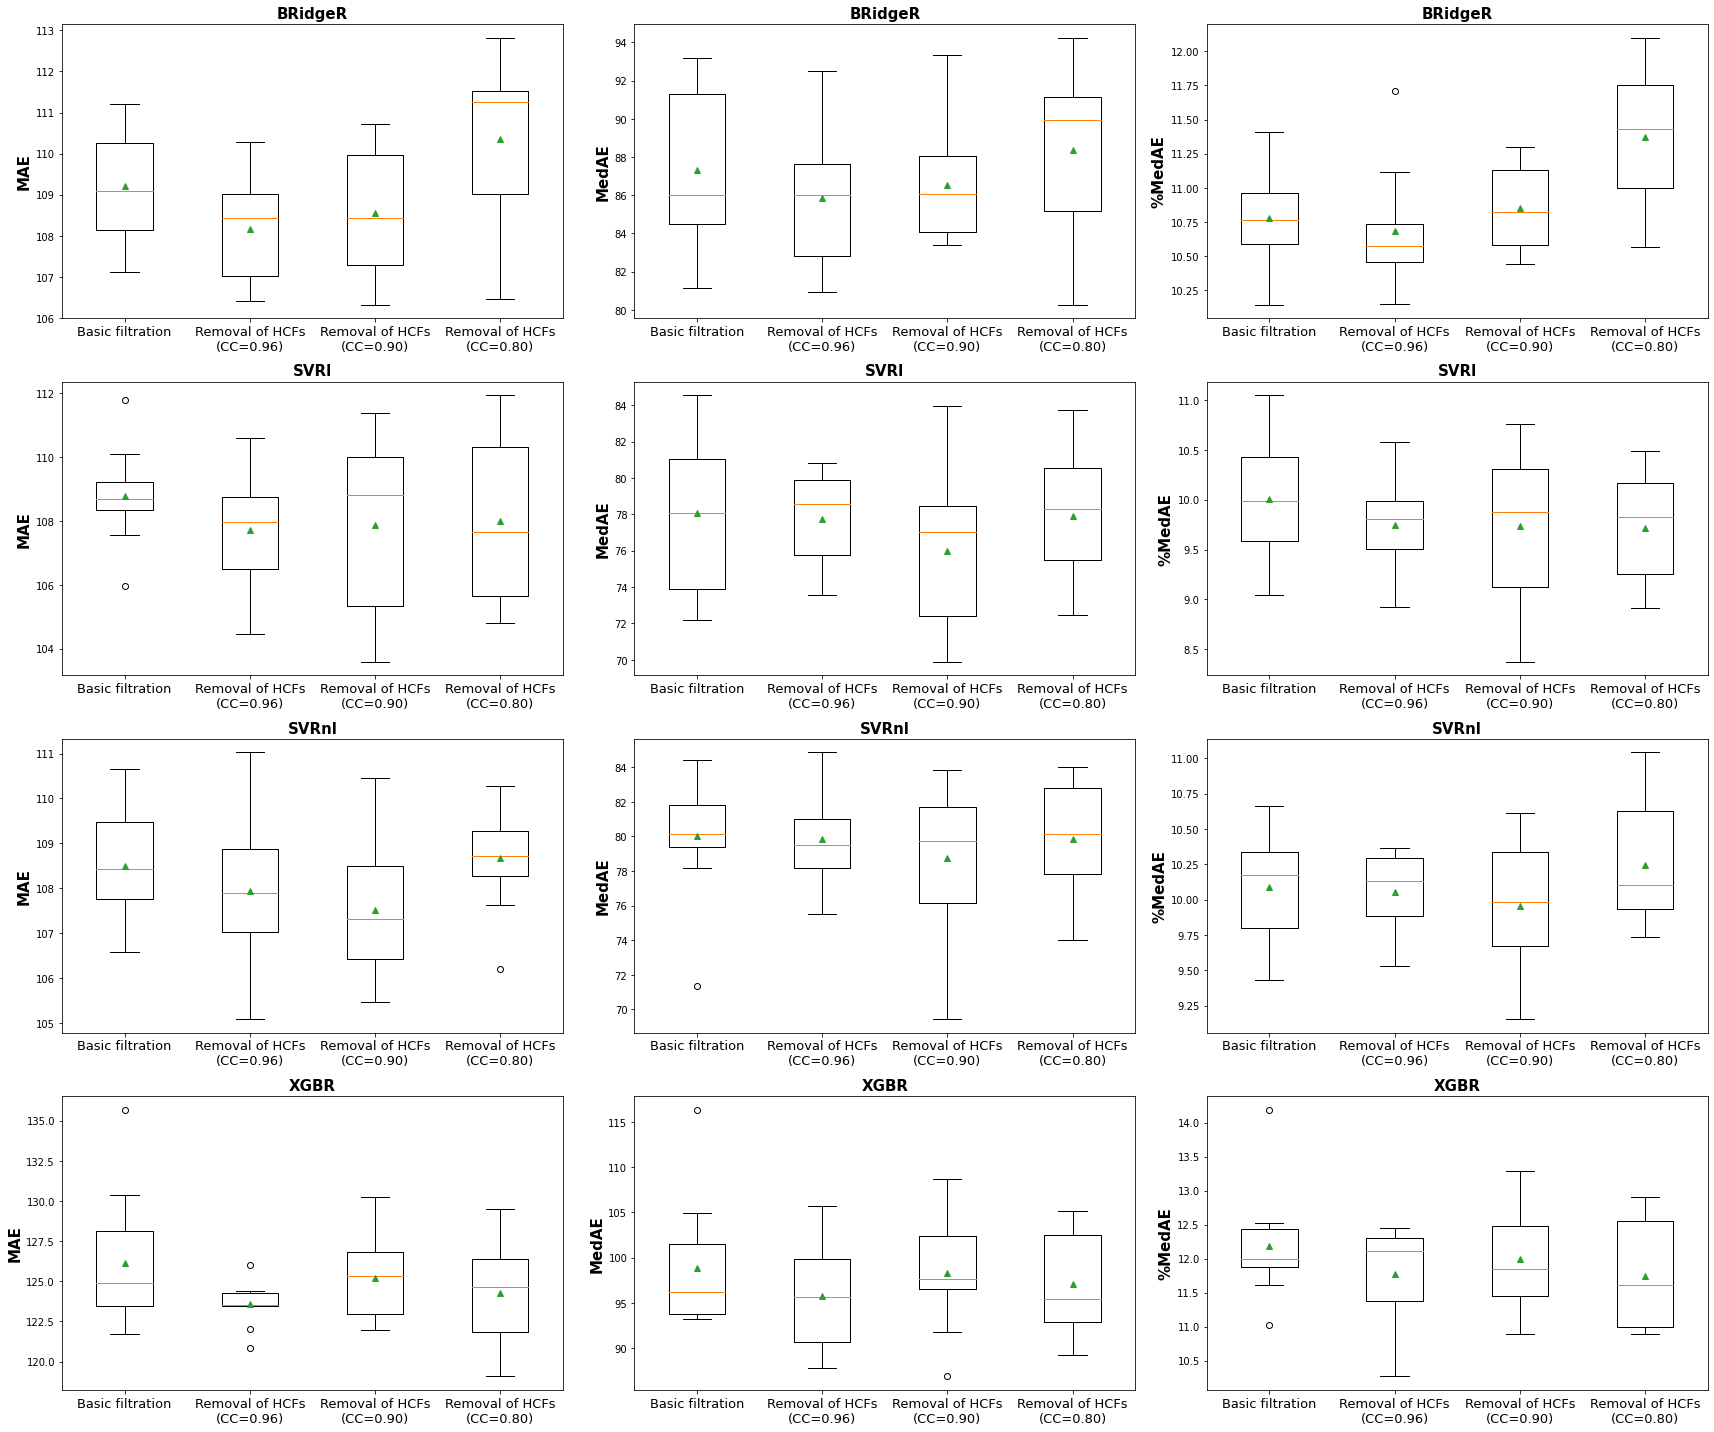

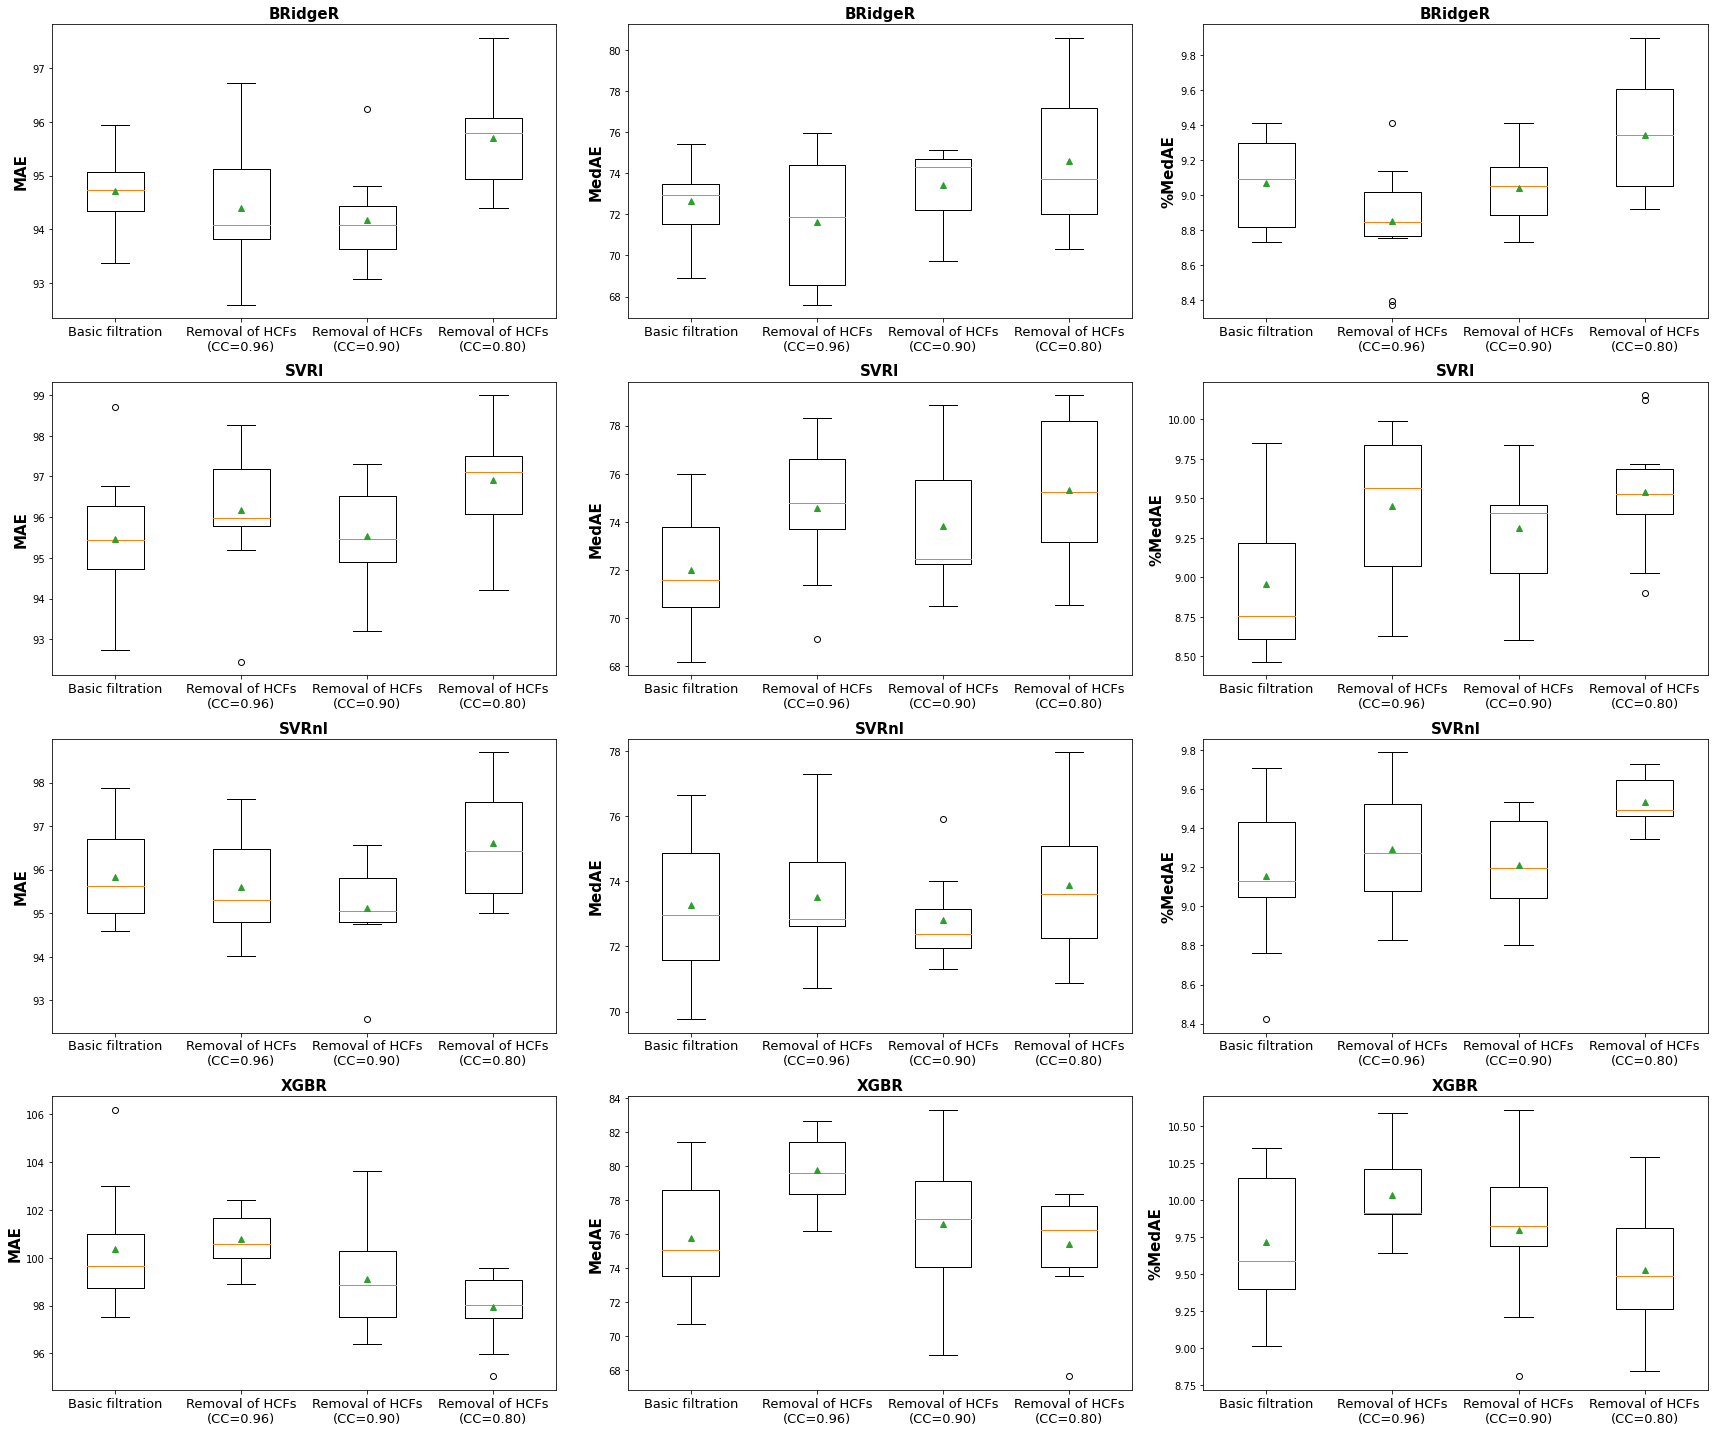

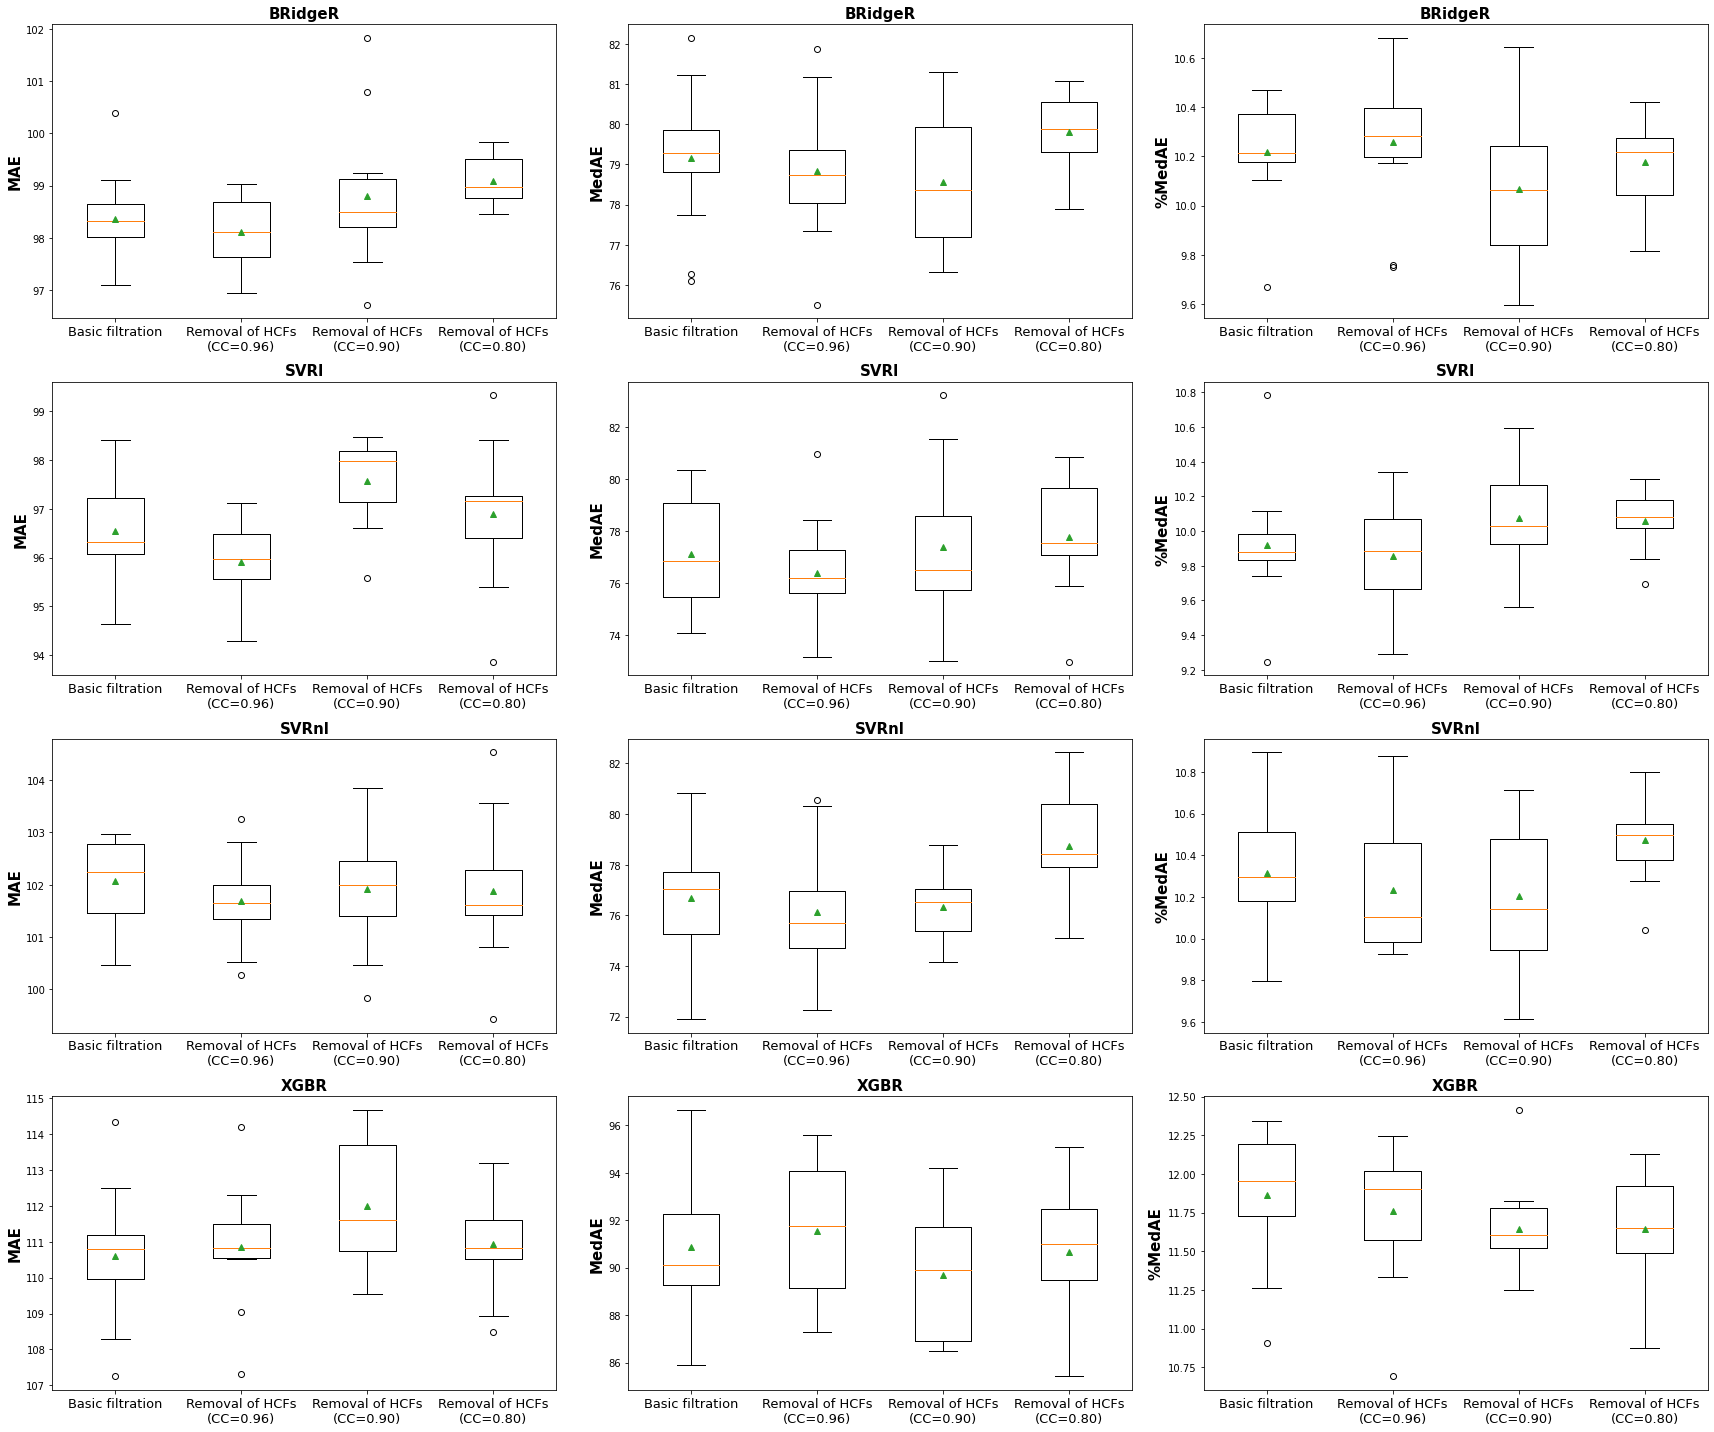

In [25]:
# Create comparative boxplots for all conditions
da.comparative_metric_boxplots(show_plot=True)

#### Store resulting dictionary to a single excel file

In [27]:
# Export dict with boxplots figures to a multisheet excel file
# Each sheet corresponds to a specific dataset
bxp_fn = 'QSRR_models_performance_comparative_BoxPlots.xlsx'
bxp_lnk = os.path.join(res_stat_dir, bxp_fn)
da.export_plots_dict_to_file(plots_dic=da.comparative_boxplots_dic, store_link=bxp_lnk, kl=1)

#### 4.2.3 Kruskal-Wallis non parametric test

In [28]:
# Perform K-W test
# Returns a dictionary with only p-values for each condition
da.kruskal_wallis_test(dropna=False, fillna='median')

#### Plot resulting p-values dictionary to a single HeatMap plot

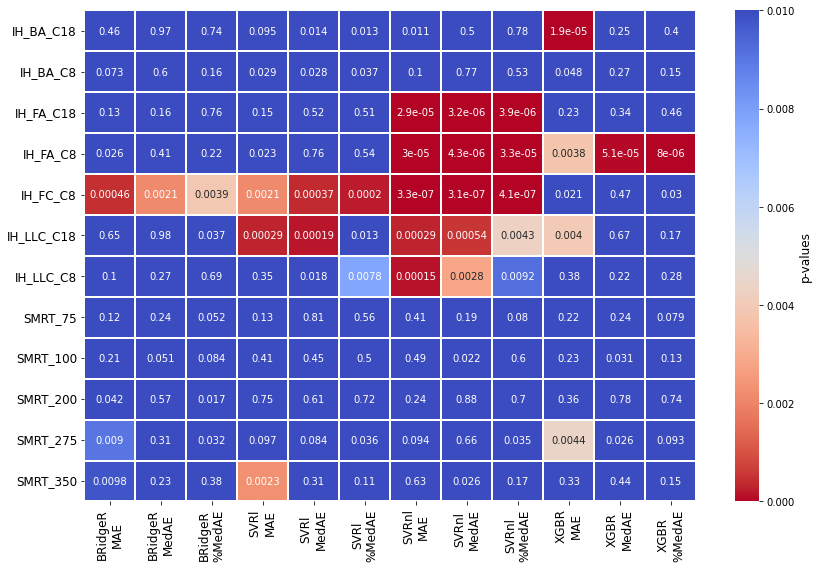

In [29]:
# Plot Kruskal_Wallis test results (p-values) as a heatmap plot and store it on disk
a = 0.01
hmp_fn = 'Kruskal_Wallis_heatmap_(a=%s).tiff'%a
hmp_lnk = os.path.join(res_stat_dir, hmp_fn)
da.kruskal_wallis_heatmap_plot(store_link=hmp_lnk, a=a, show_plot=True)

#### 4.2.4 Dunn's post-hoc test with Bonferroni adjustment

In [30]:
# Perform Dunn's test
da.bonferroni_post_hoc_test(a=a, p_adjust='bonferroni')

#### Plot resulting p-values dictionary to a single HeatMap plot

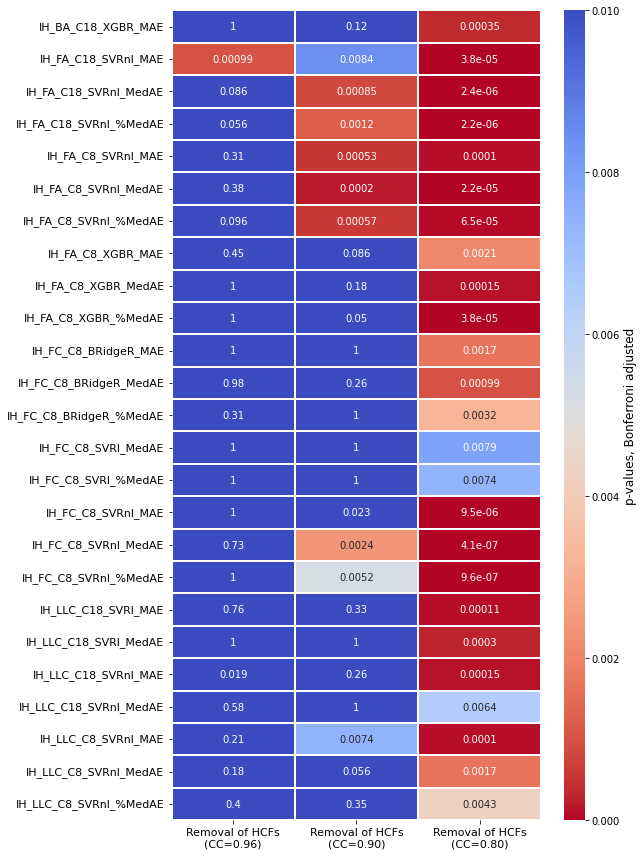

In [31]:
# Plot Bonferroni test results (p-values) as a heatmap plot and store it on disk
bon_hmp_fn = 'Bonferroni_post_hoc_test_heatmap_(a=%s).tiff'%a
bon_hmp_lnk = os.path.join(res_stat_dir, bon_hmp_fn)
da.bonferroni_test_heatmap_plot(store_link=bon_hmp_lnk, a=a, show_plot=True)

#### 4.2.5 Annotate K-W heatmap with Dunn's test results

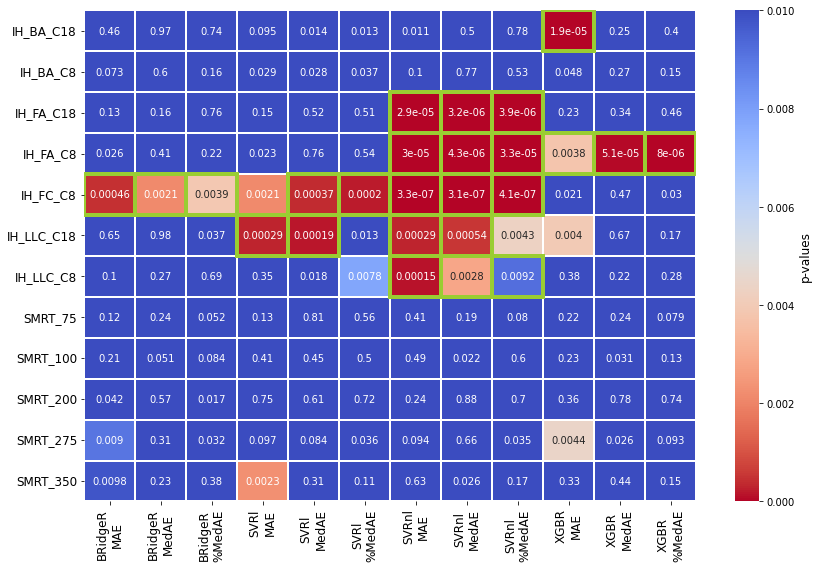

In [32]:
# Plot highlighted K-W heatmap and store it on disk
hl_kw_hmp_fn = 'Kruskal_Wallis_highlighted_heatmap_(a=%s).tiff'%a
hl_kw_hmp_lnk = os.path.join(res_stat_dir, hl_kw_hmp_fn)
da.highlight_kruskal_wallis_heatmap(store_link=hl_kw_hmp_lnk, a=a, show_plot=True)

#### 4.3 Regression-Residuals plots
Creates various types of Regression-Residuals plots for all datasets for each combination of metric-datasets' configuration. There are 3 available types of plot to choose:
 - plot_type 1: Regression plots<br>
 - plot_type 2: Single Residuals plots<br>
 - plot_type 3: Complex Residuals-Hist-QQ plots<br>

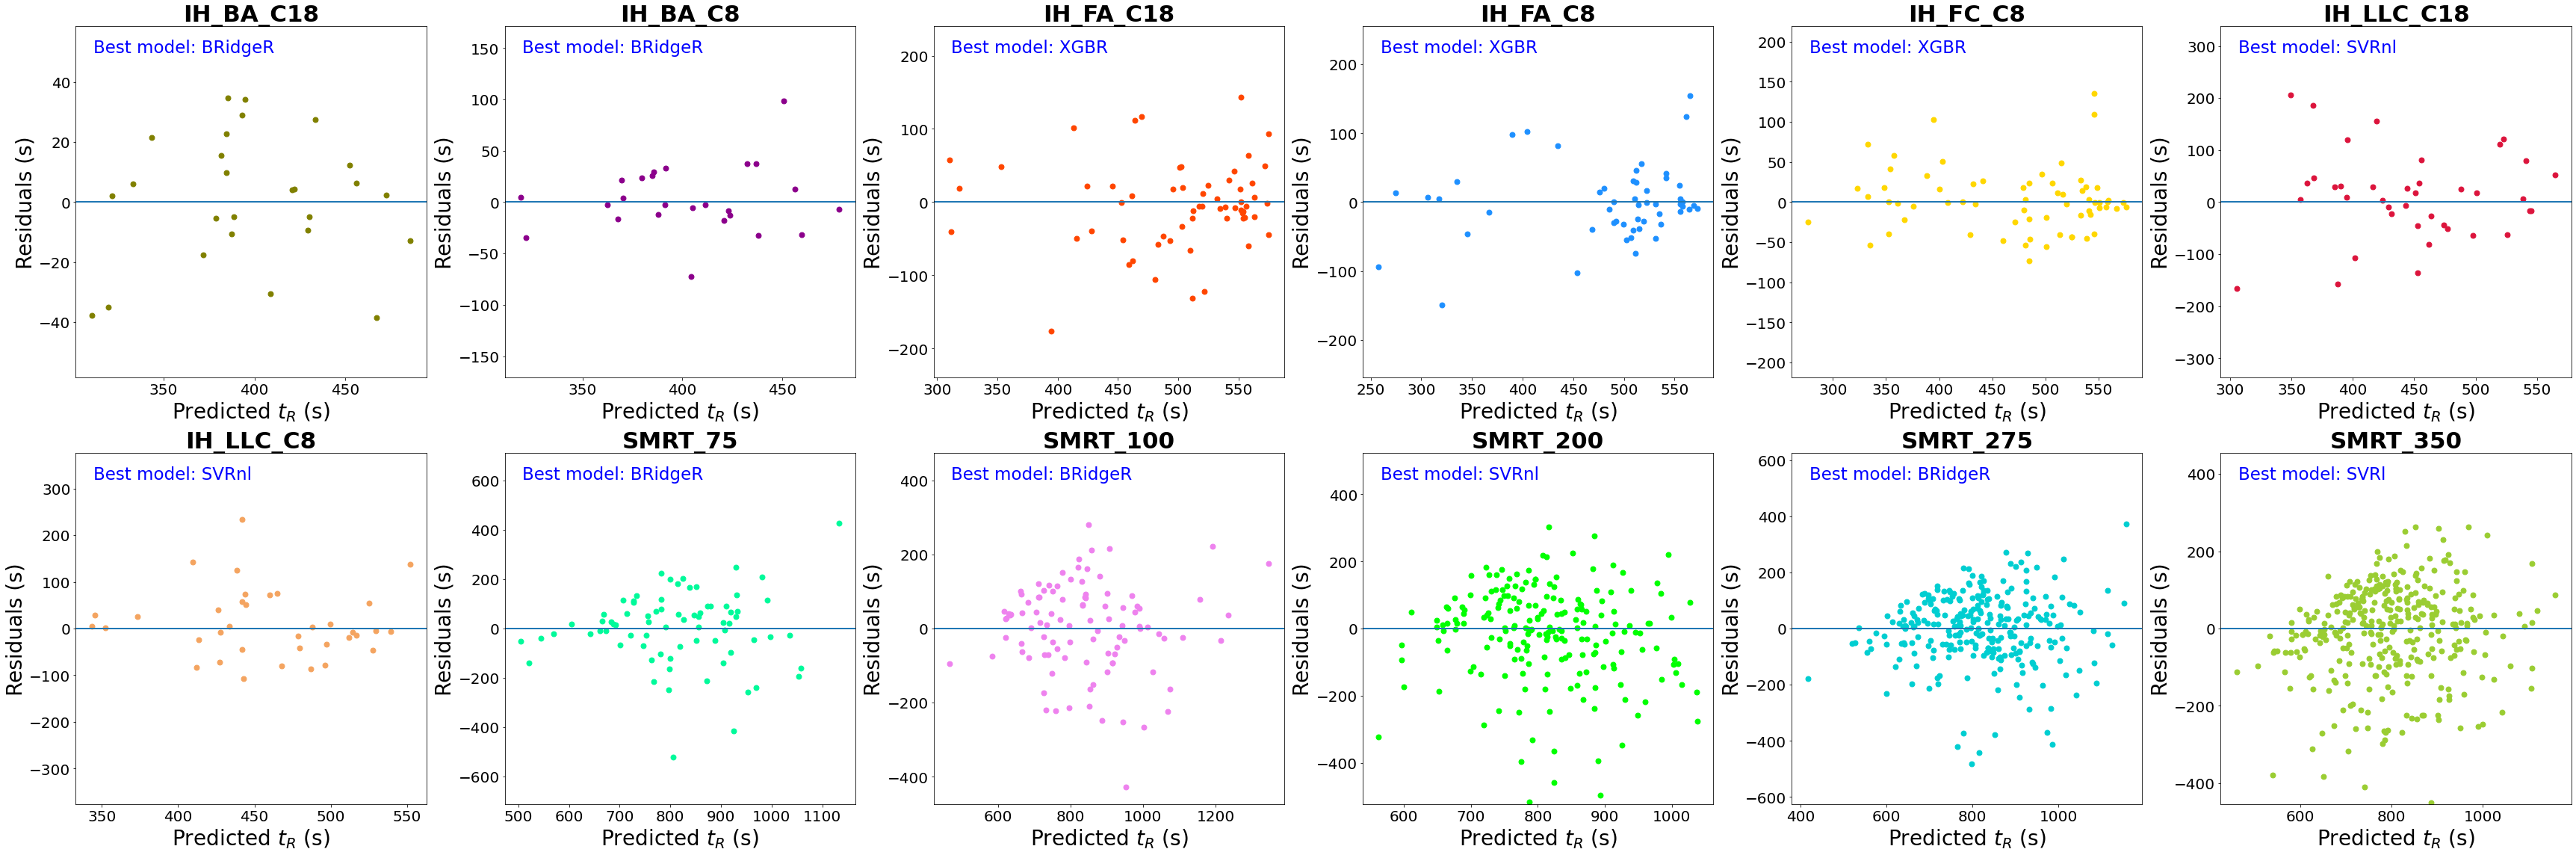

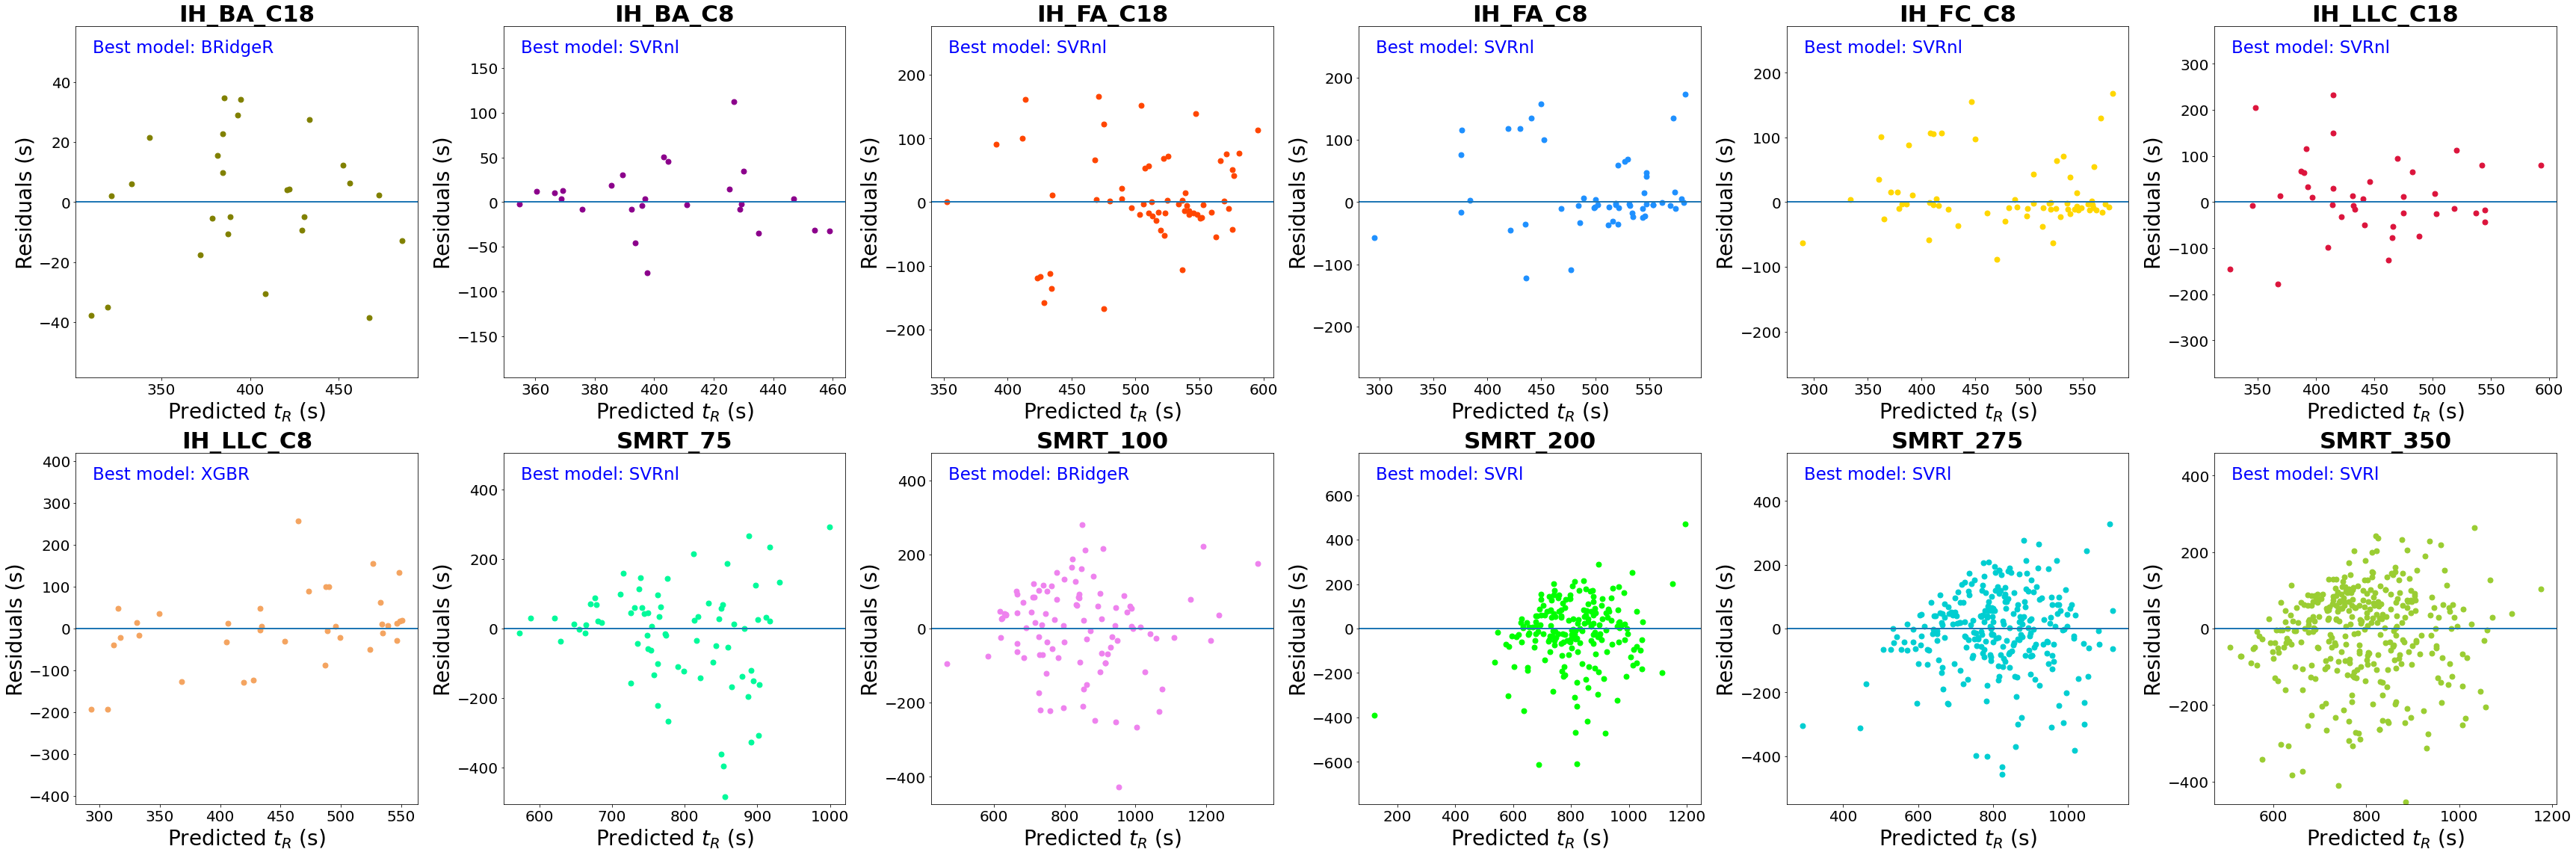

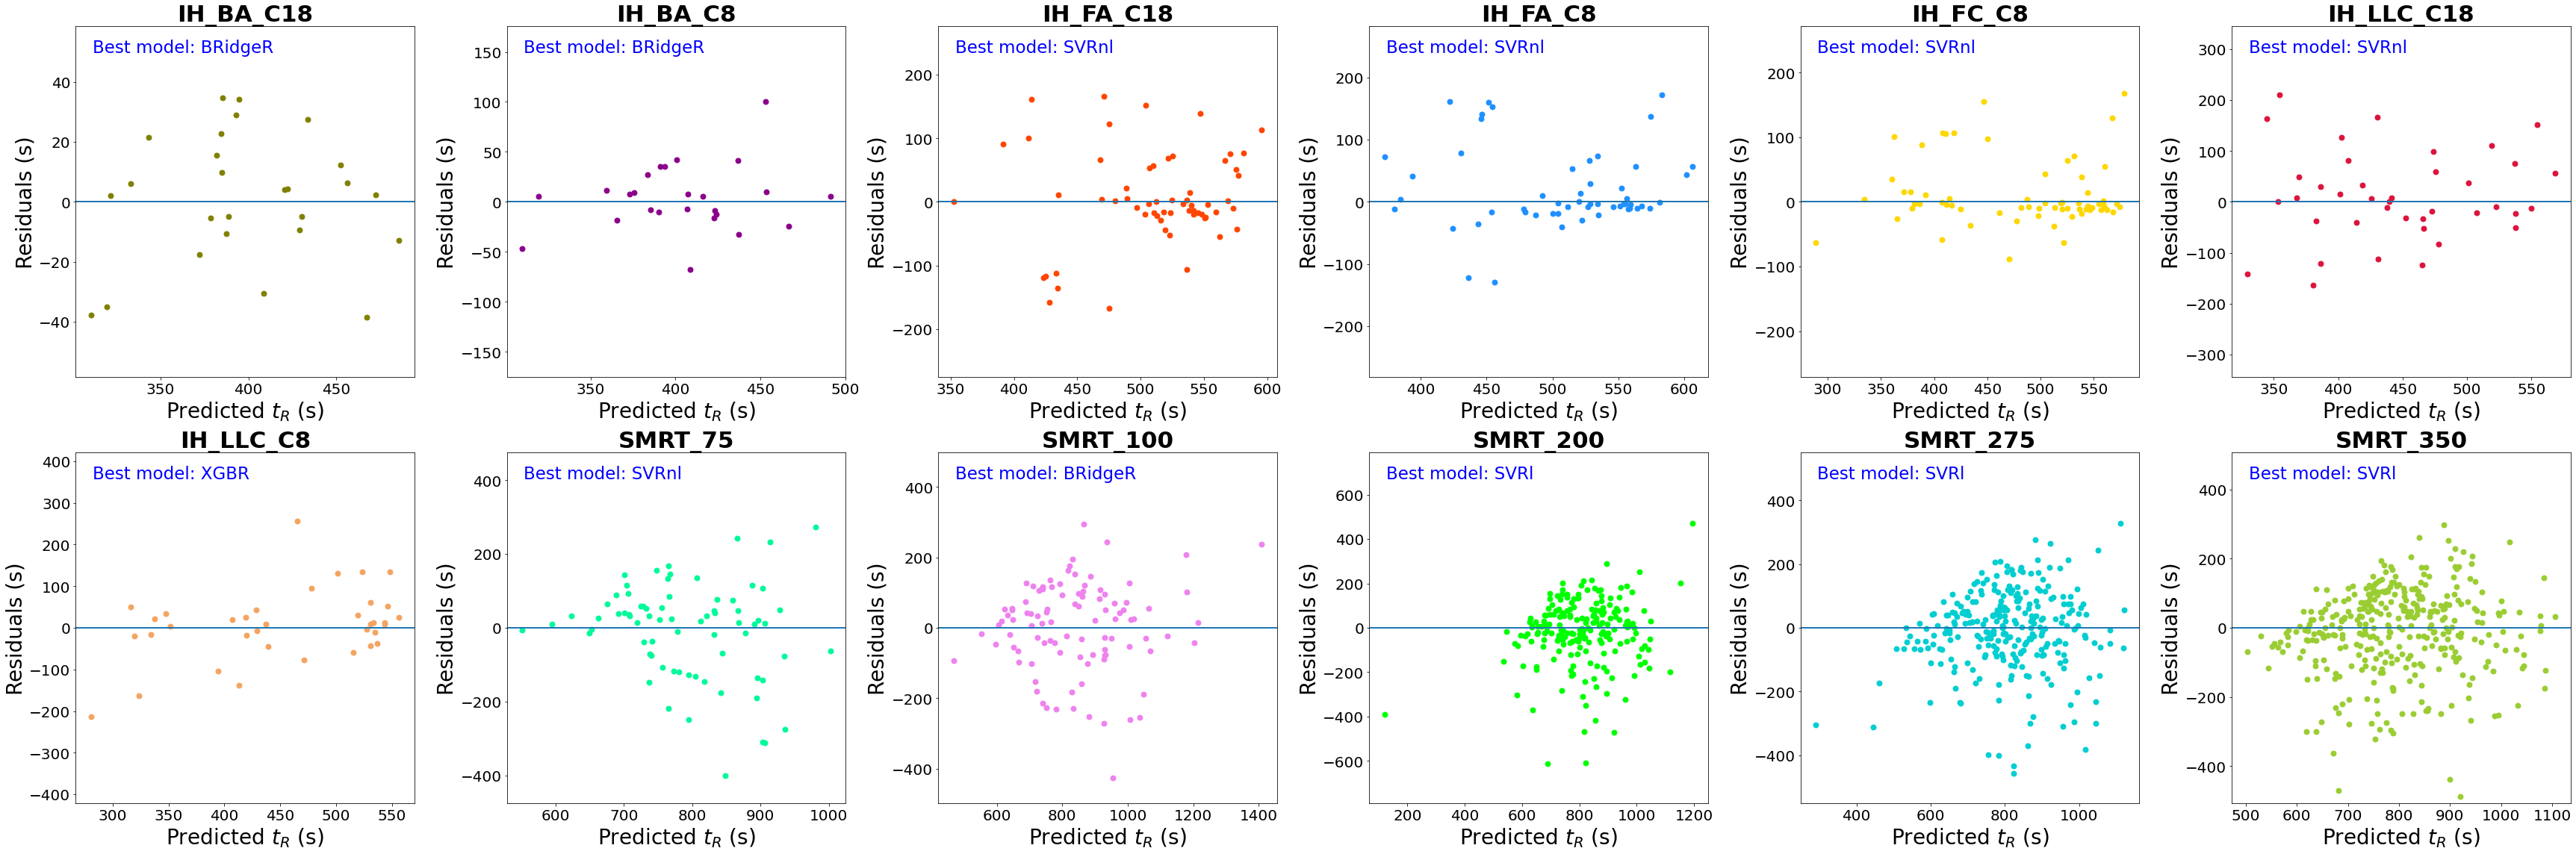

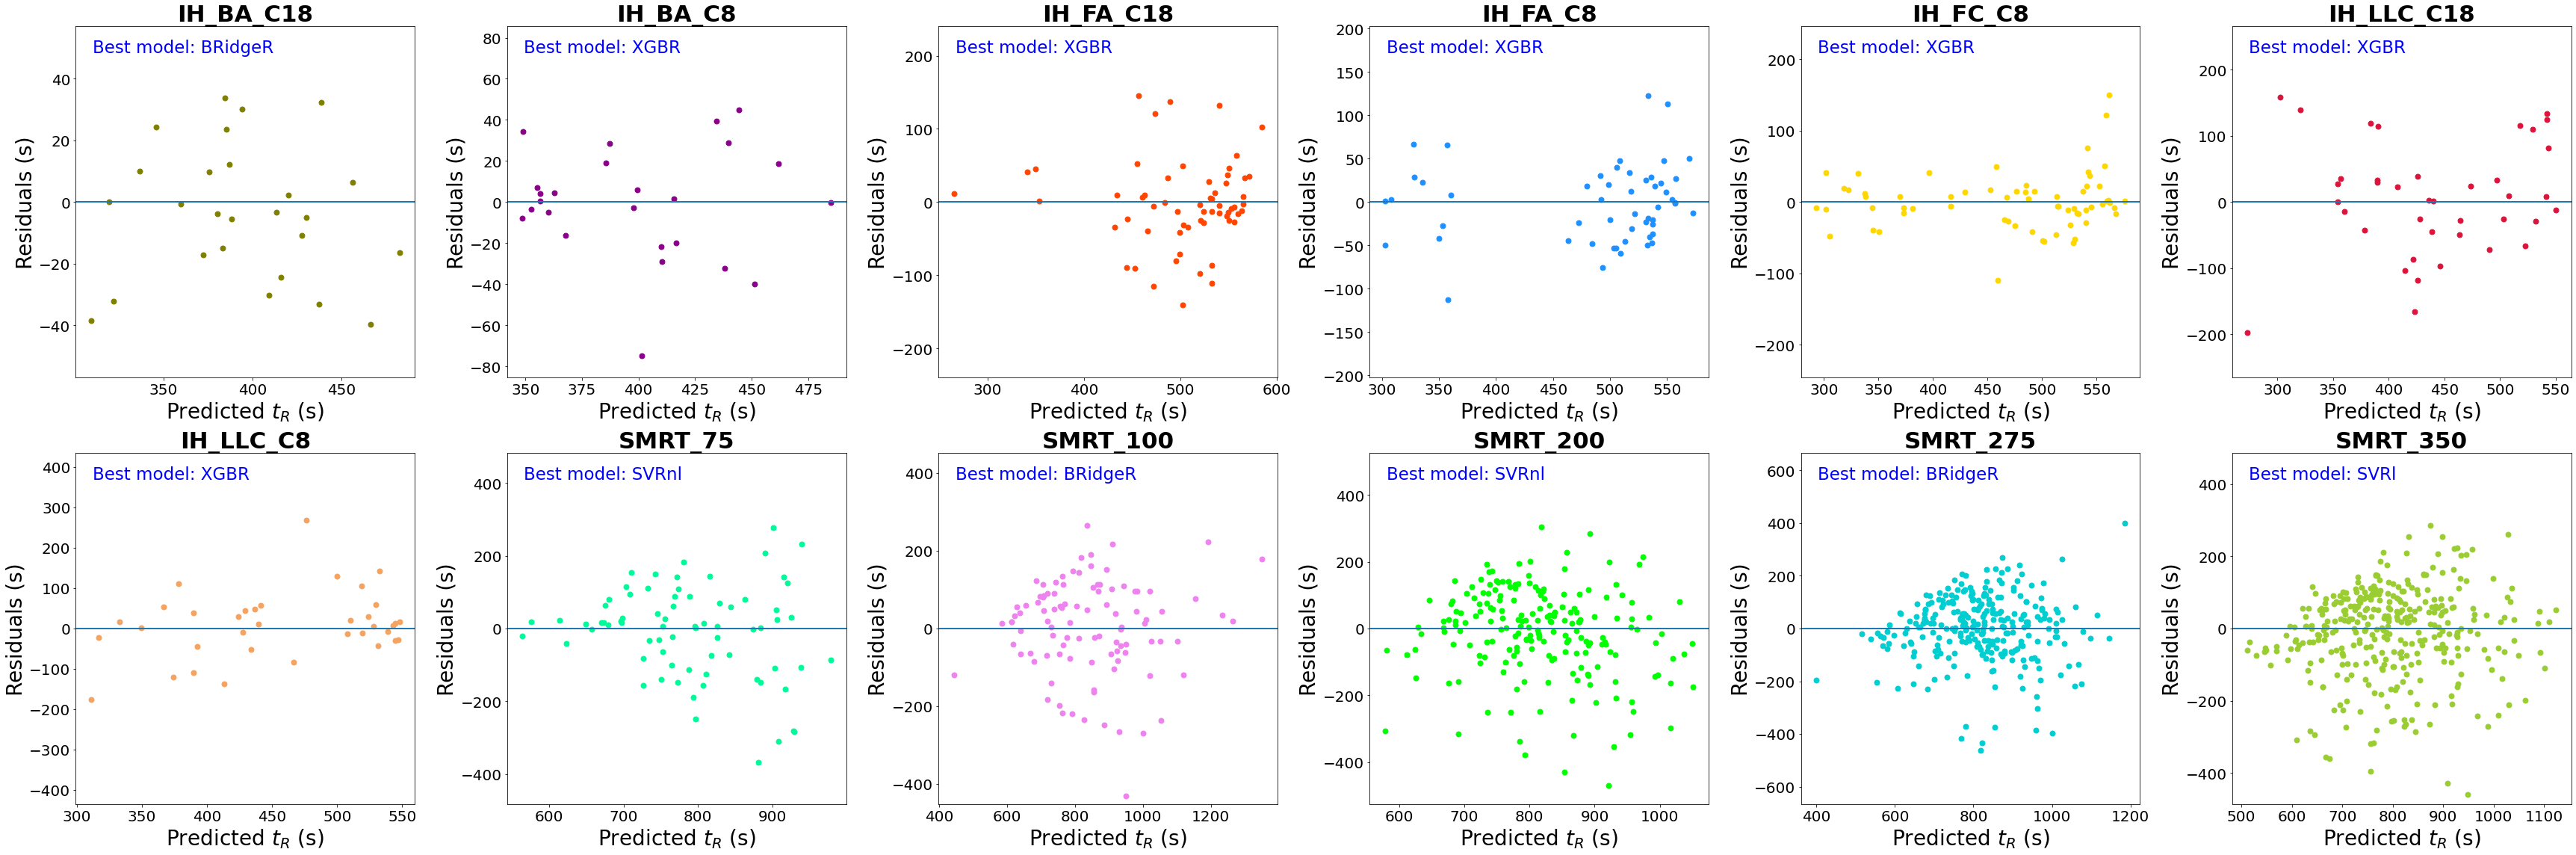

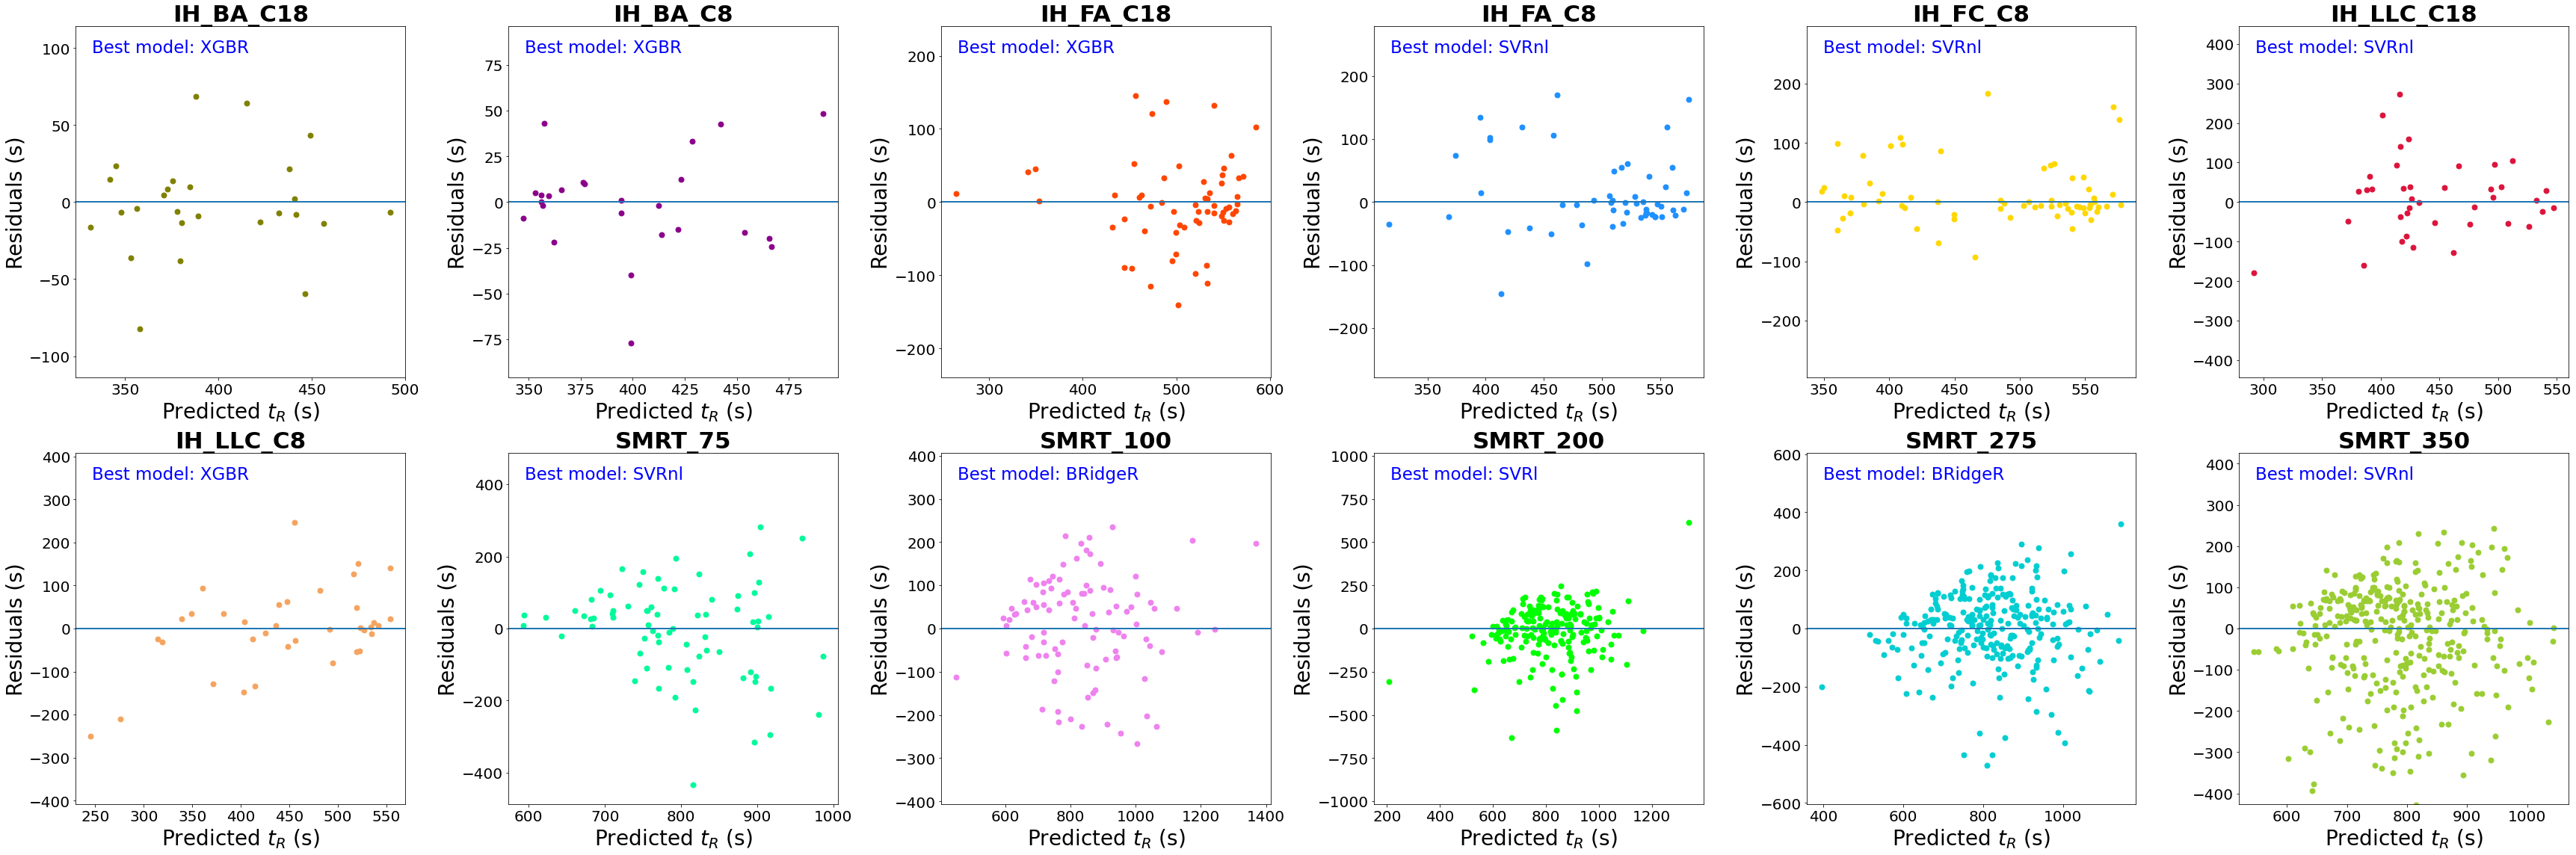

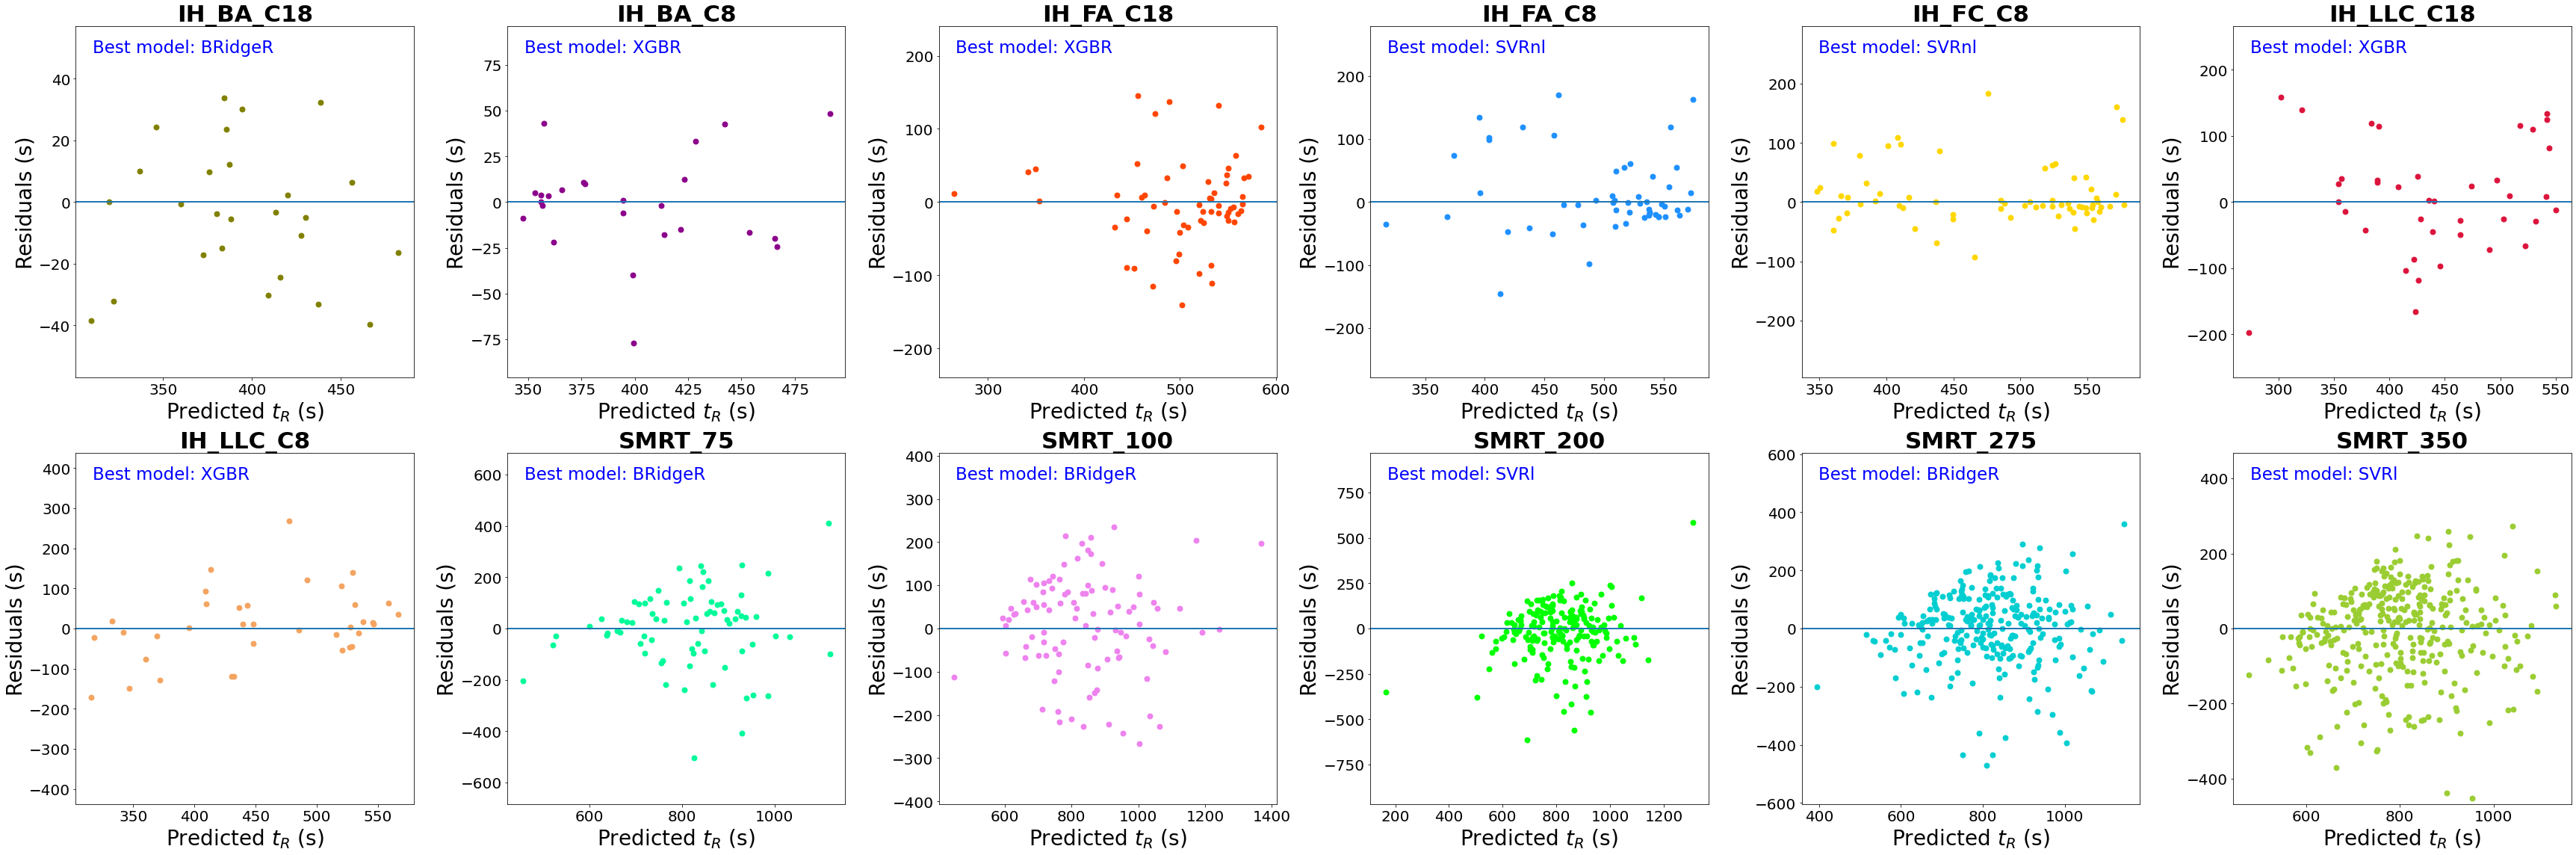

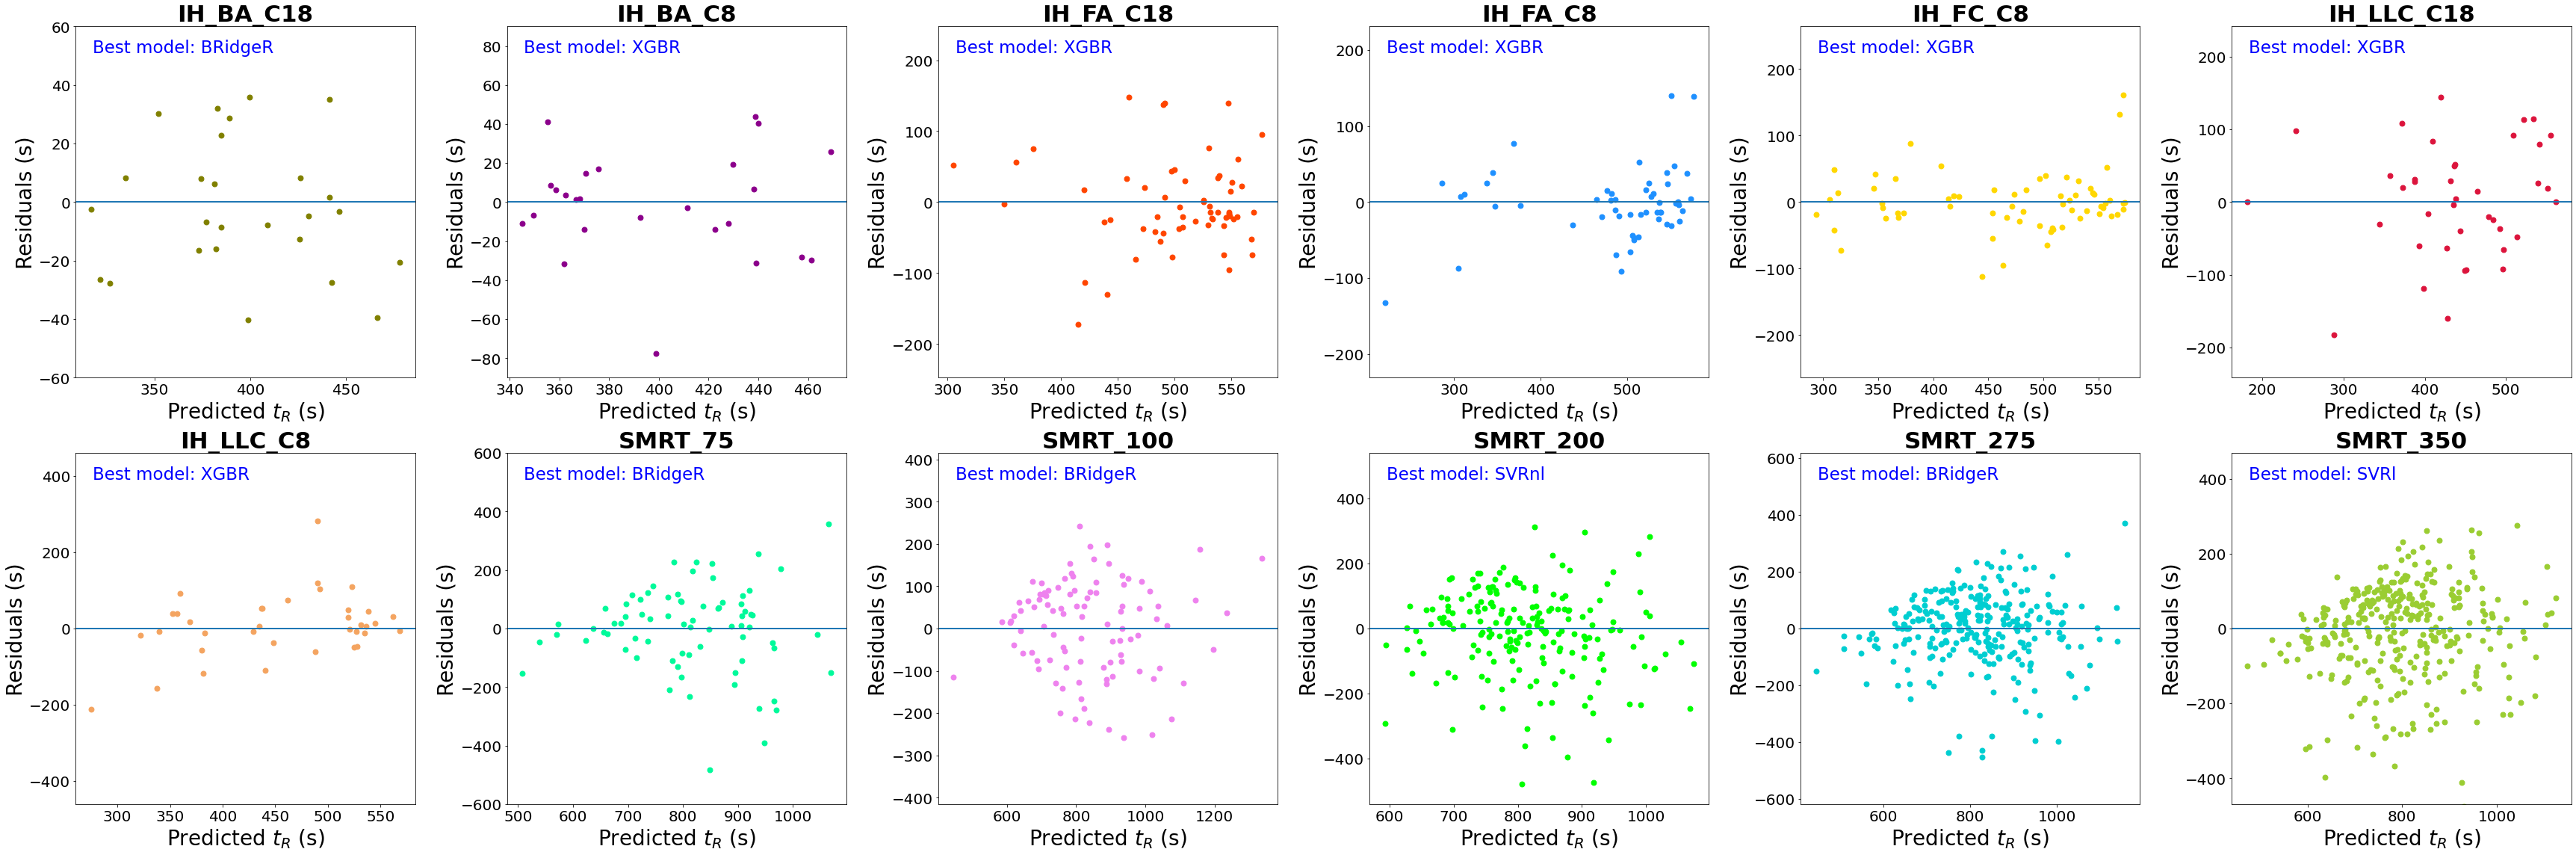

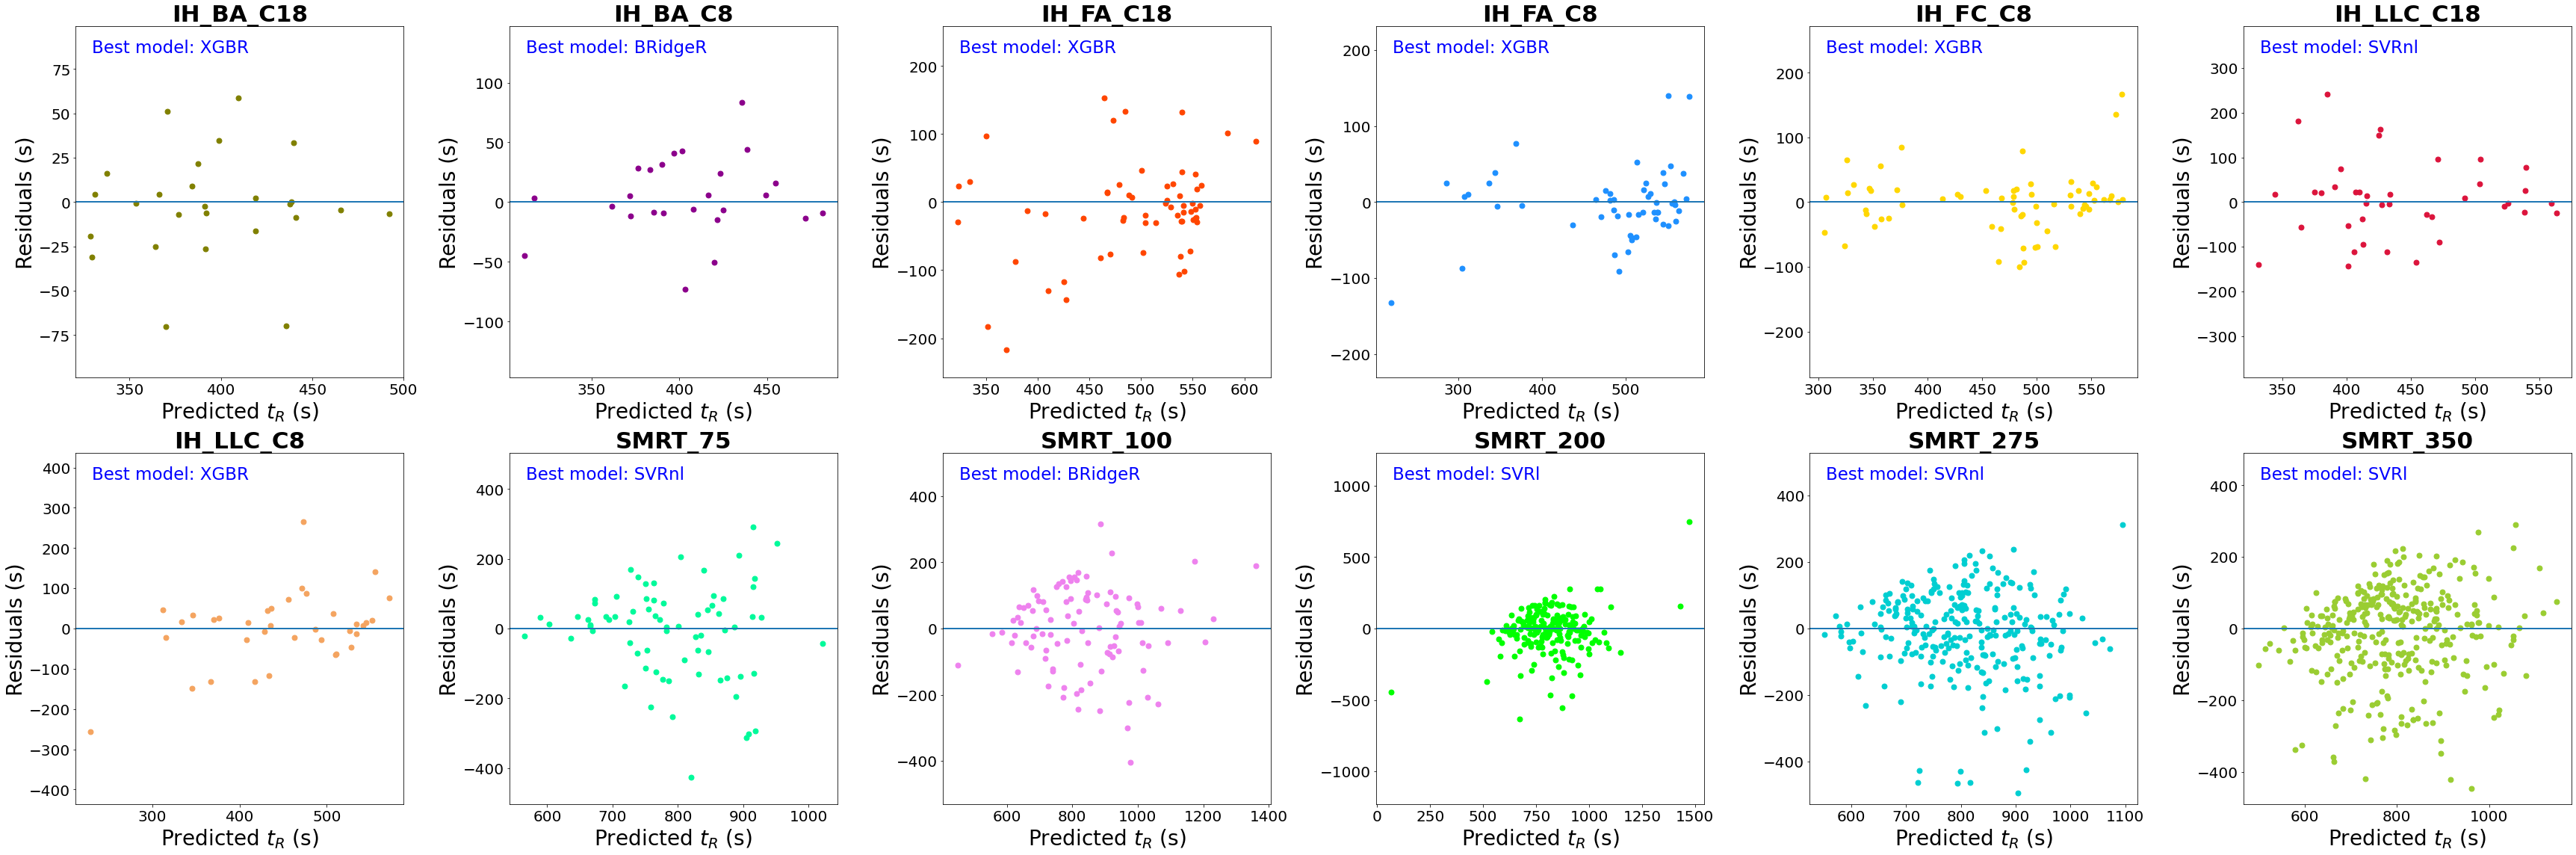

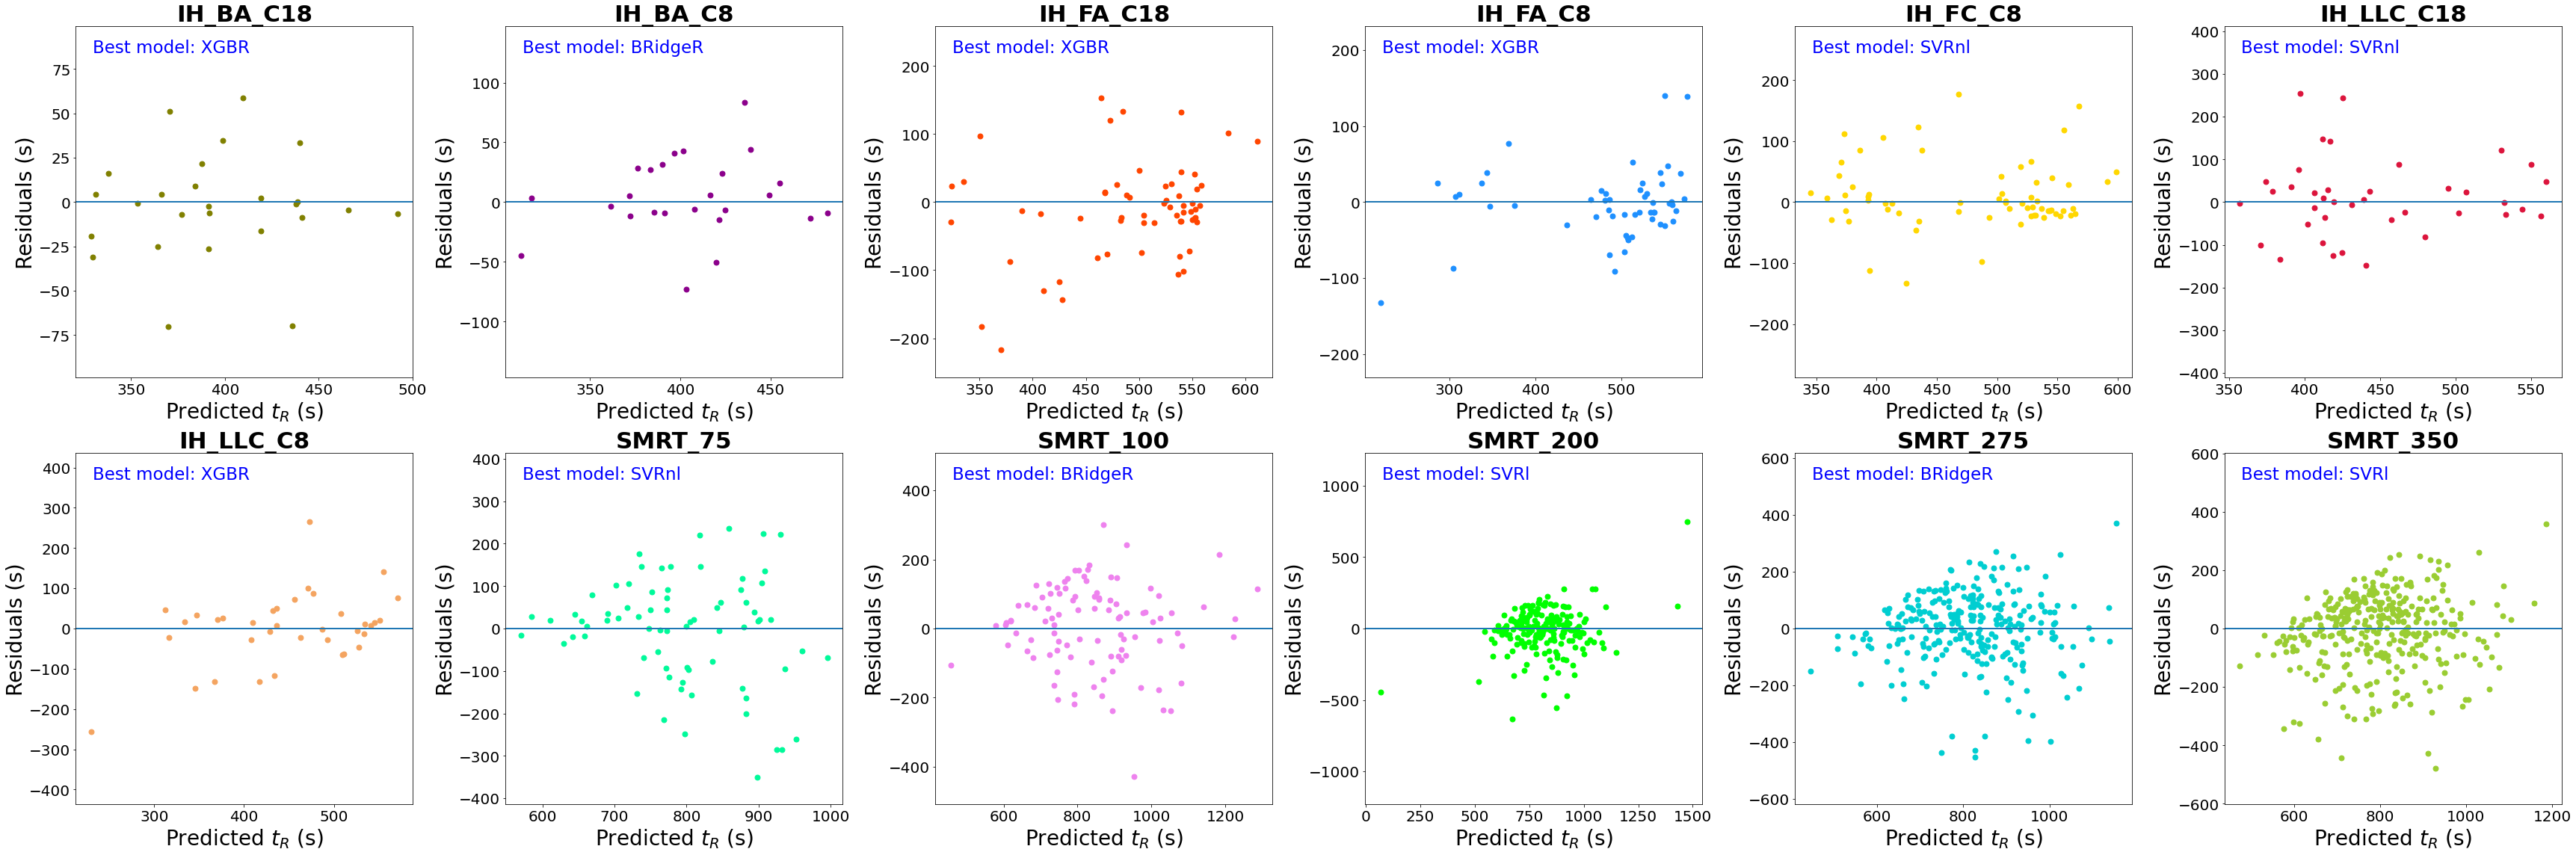

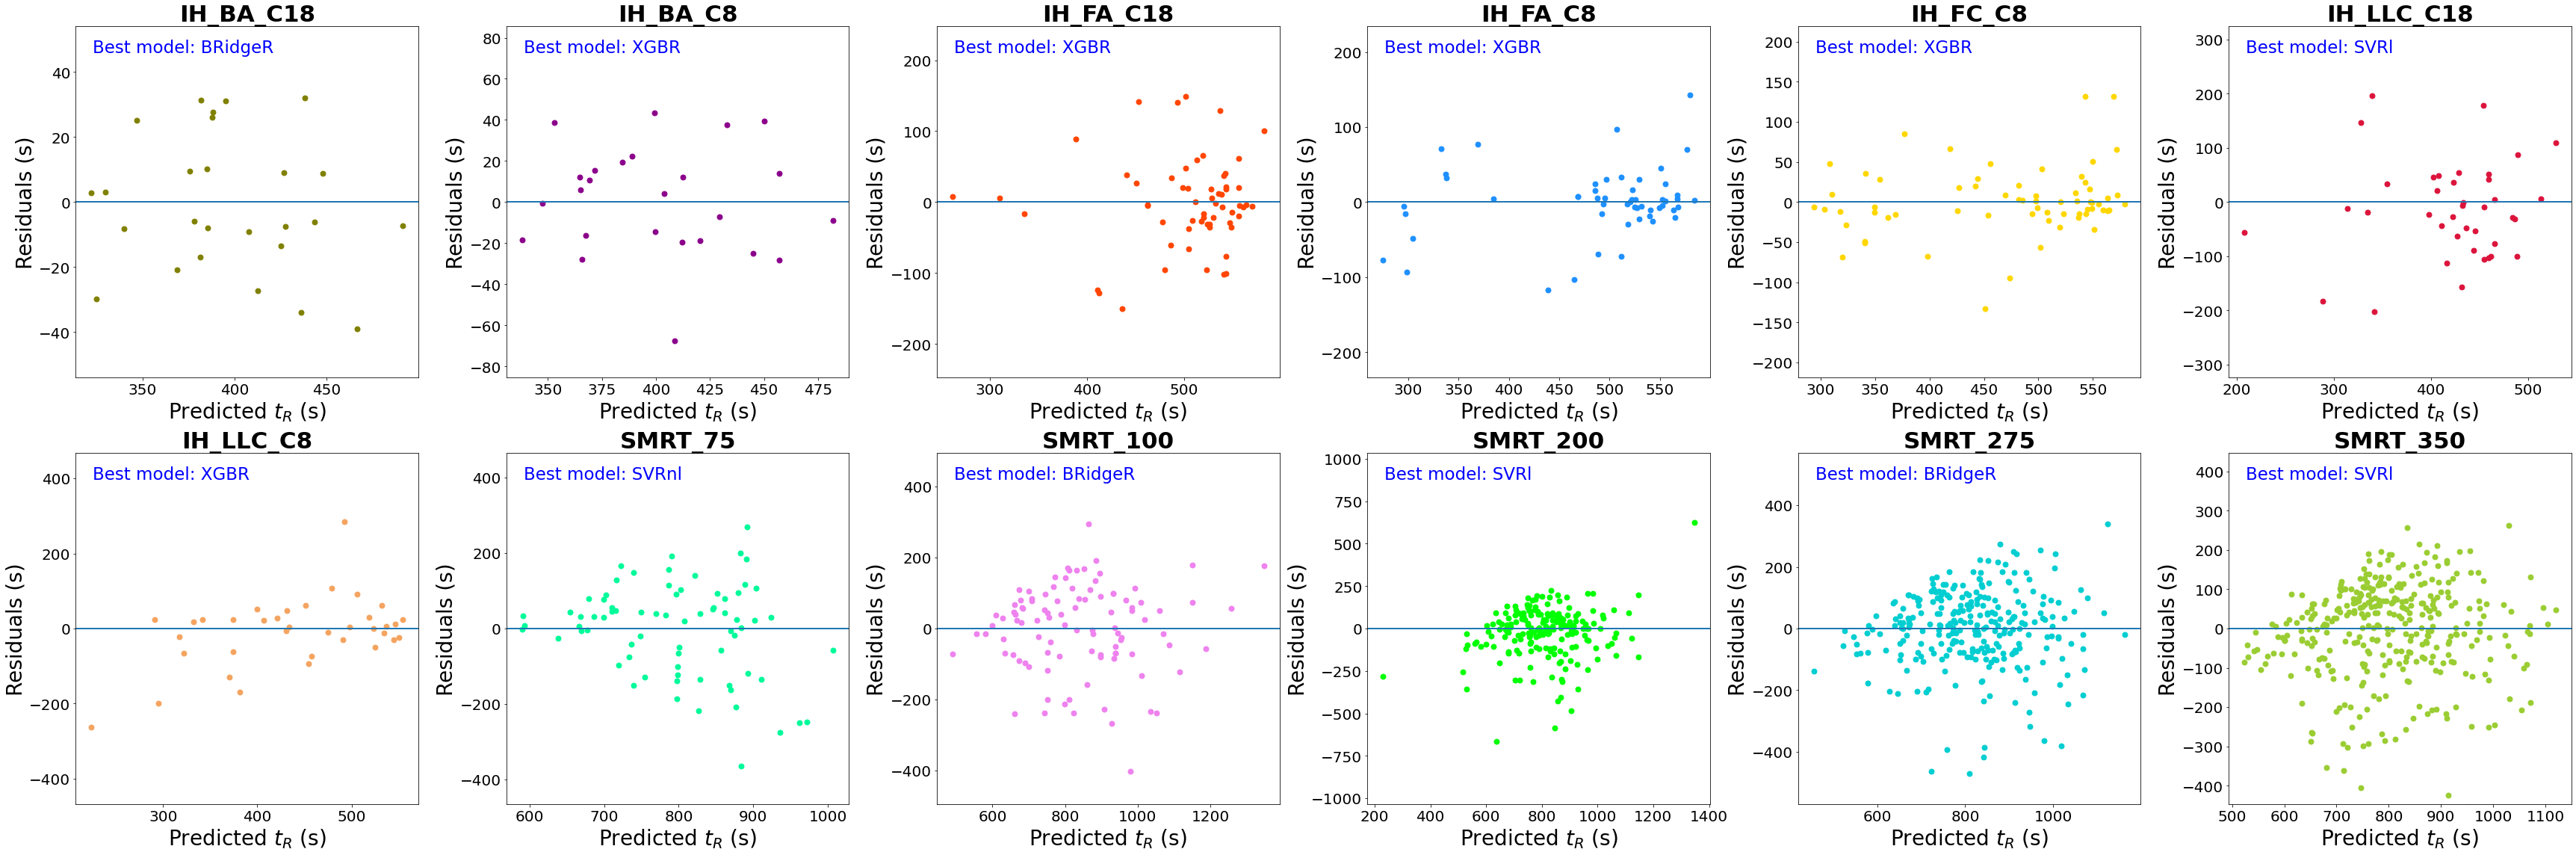

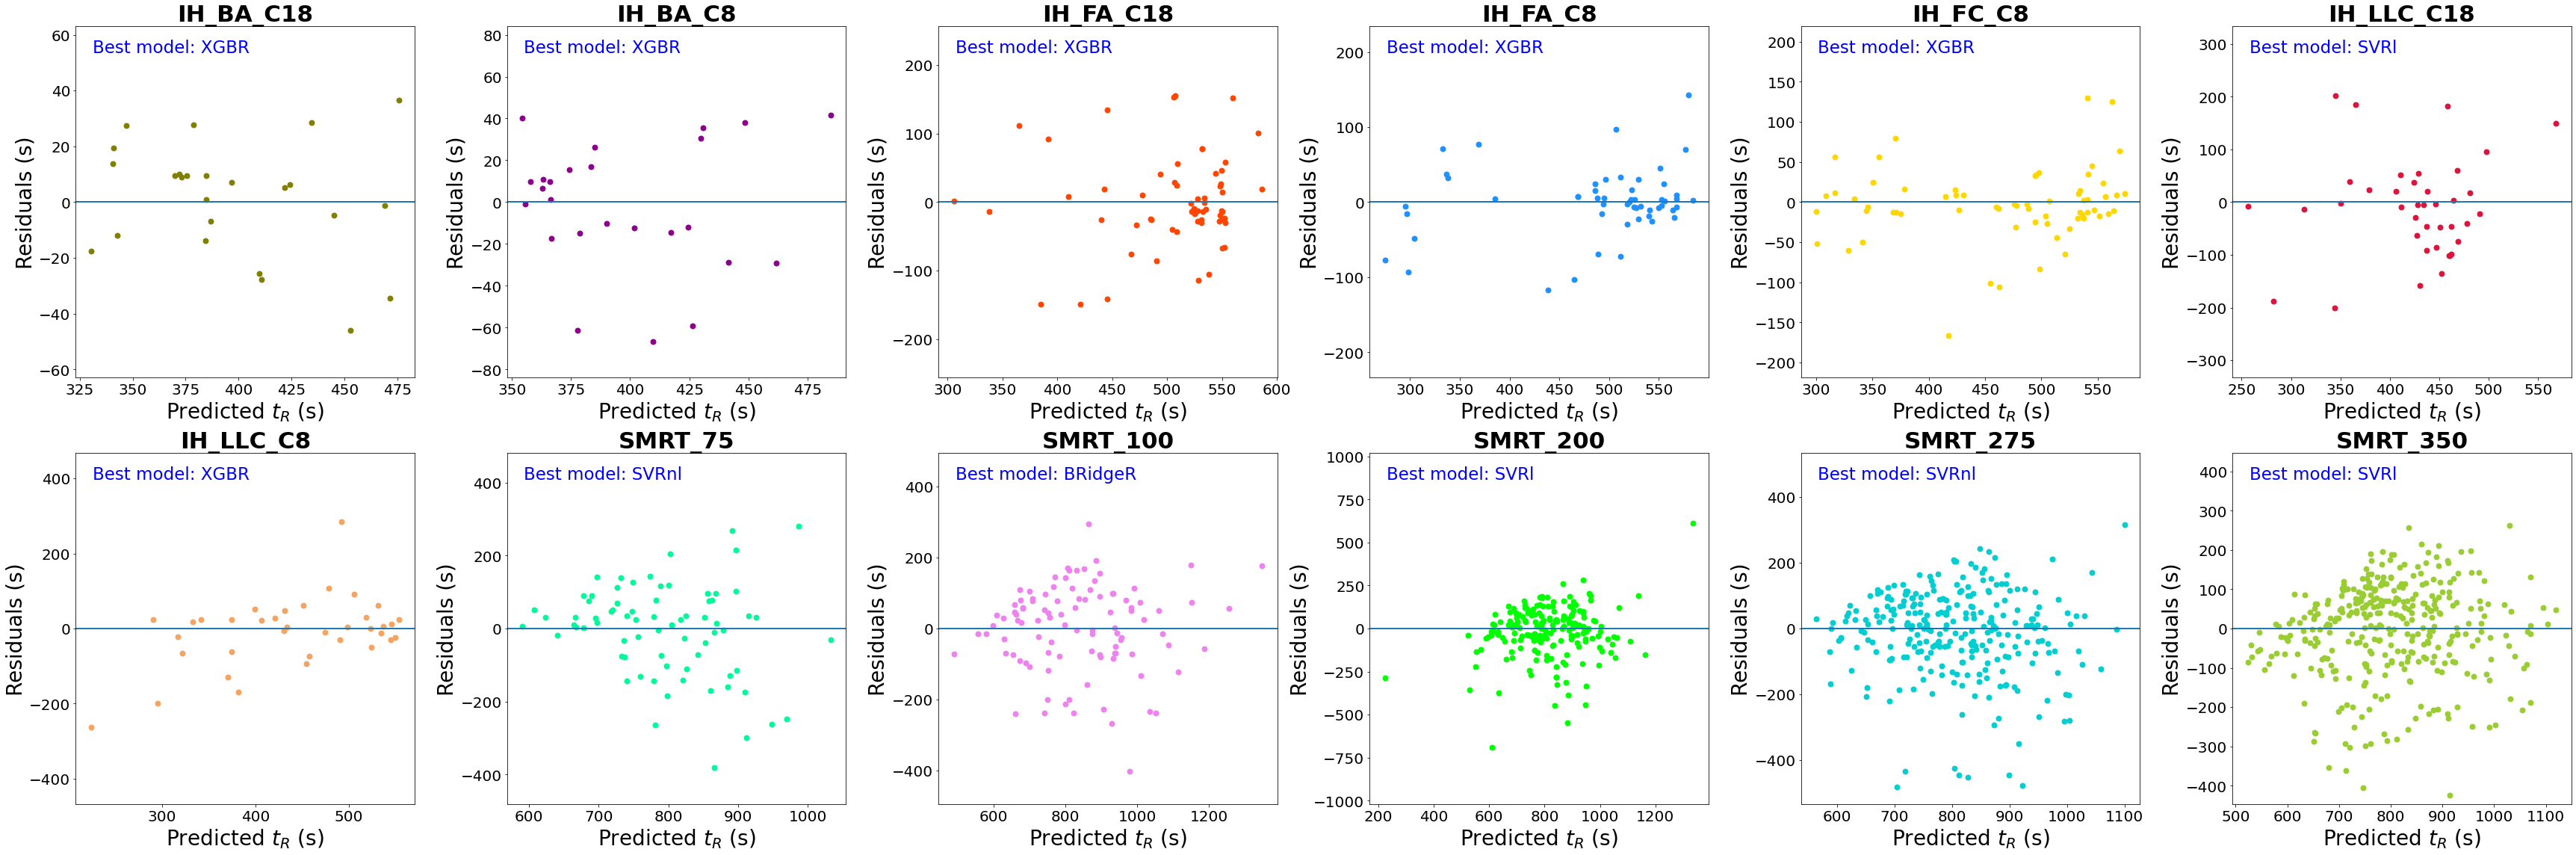

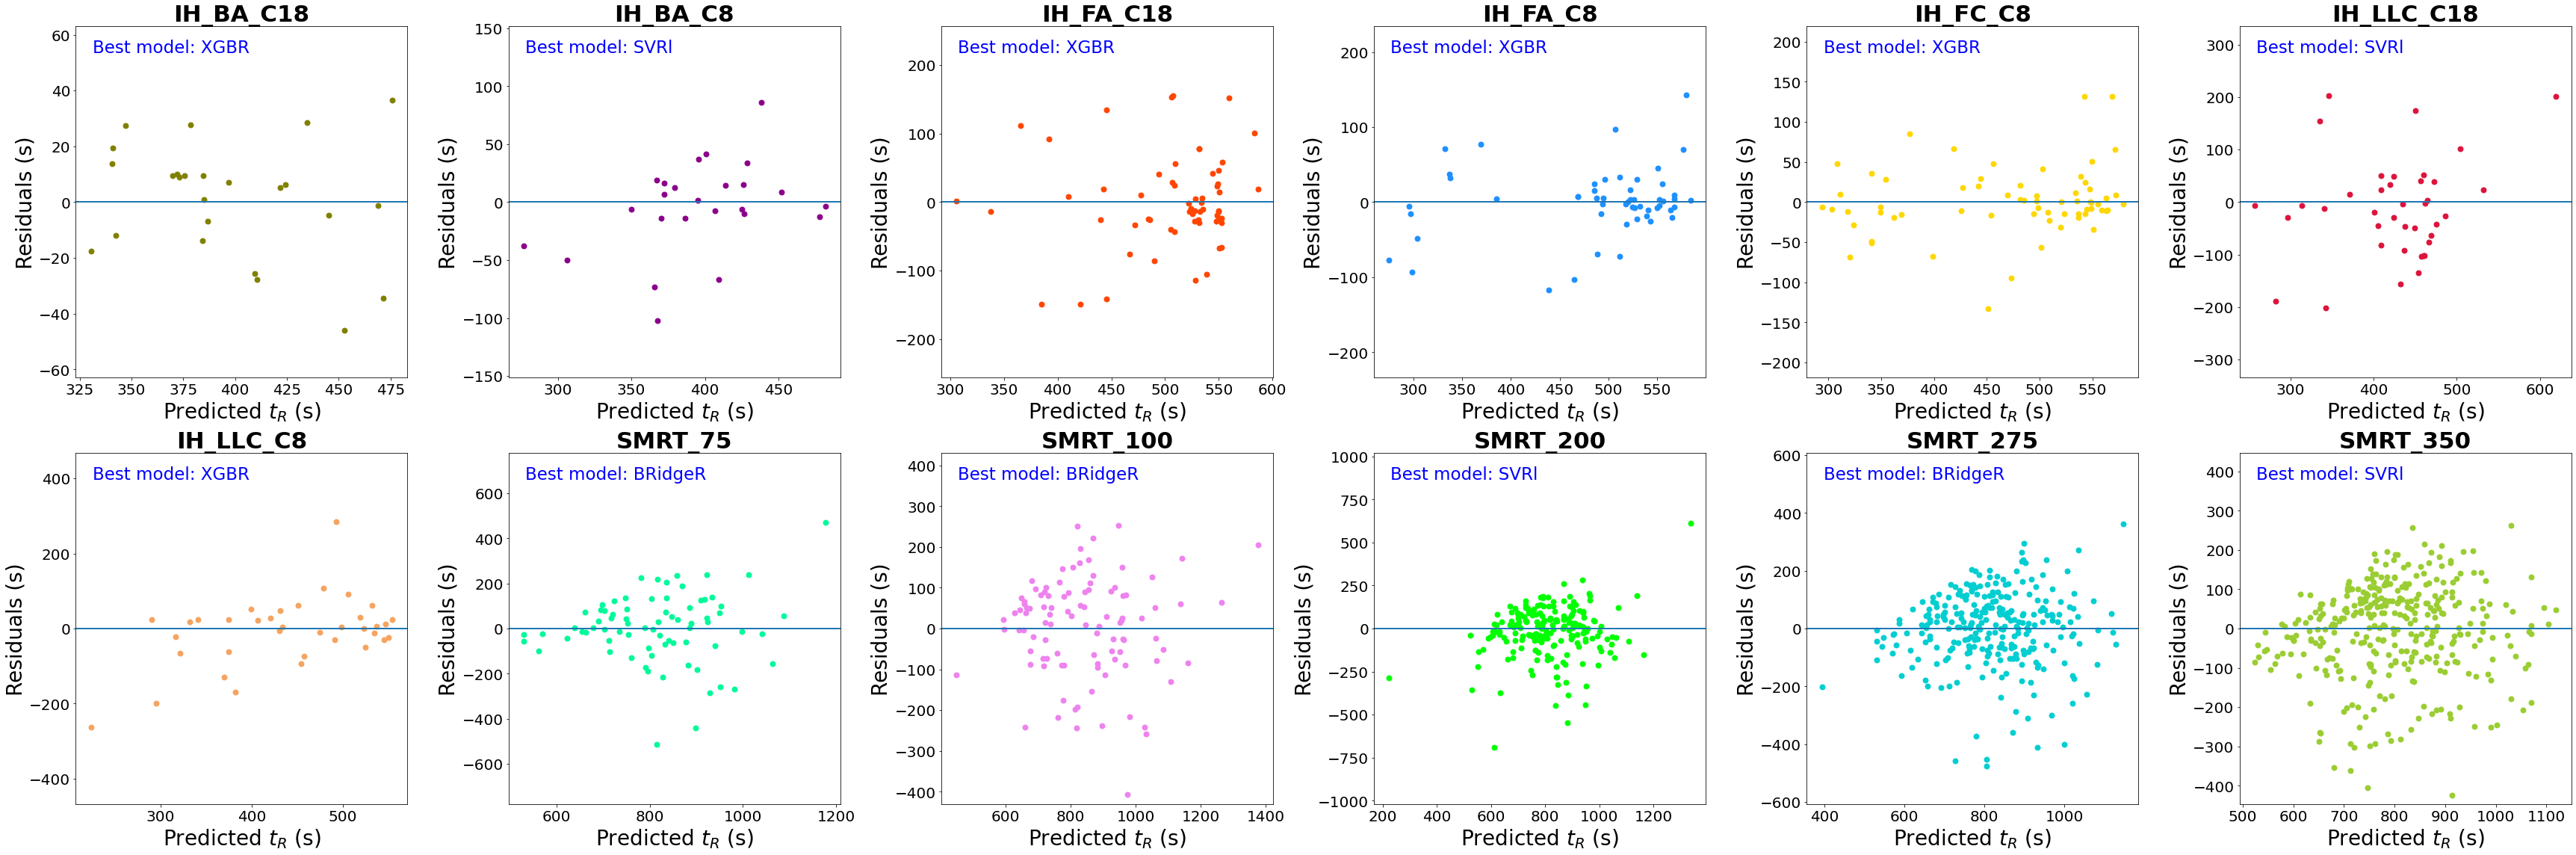

In [33]:
# Create a specific type of Regression-Residuals plots
rr_plot_type = 2

if(rr_plot_type == 3):
    cols_n=3
else:
    cols_n=6
da.create_regr_resid_plots(cols_n=cols_n, col_width=8, rr_plot_type=rr_plot_type,
                           show_plot=True)

#### Store resulting figures dictionary to a single excel file and a separate image file for each metric-datasets' configuration combination

In [34]:
# Directory to store specific plots
if not os.path.exists(res_reg_resd_plots_dir):
    os.makedirs(res_reg_resd_plots_dir)

In [35]:
# In the case of excel files, a single multisheet file is created
# Each sheet corresponds to a specific metric-datasets' configuration
if(rr_plot_type == 1):
    ar_dic_fn = 'Regression_plots.xlsx'
if(rr_plot_type == 2):
    ar_dic_fn = 'Residuals_plots.xlsx'
if(rr_plot_type == 3):
    ar_dic_fn = 'Complex_residuals_plots.xlsx'
ar_dic_fn_lnk = os.path.join(res_reg_resd_plots_dir, ar_dic_fn)
da.export_plots_dict_to_file(da.regr_resid_plots_dic, ar_dic_fn_lnk, kl=2)

In [36]:
# Plots to individual image files
# Create a separate subdirectory

if(rr_plot_type == 1):
    save_dir_n = 'Individual_regression_plots'
    suffix_n = 'regression_plots'
if(rr_plot_type == 2):
    save_dir_n = 'Individual_residuals_plots'
    suffix_n = 'residuals_plots'
if(rr_plot_type == 3):
    save_dir_n = 'Individual_complex_residuals_plots'
    suffix_n = 'complex_residuals_plots'
    
save_dir_lnk = os.path.join(res_reg_resd_plots_dir, save_dir_n)
if not os.path.exists(save_dir_lnk):
    os.makedirs(save_dir_lnk)
    
for cc in da.regr_resid_plots_dic.keys():
    for metric in da.regr_resid_plots_dic[cc].keys():
        fig_n = '%s_%s_%s.tiff' %(metric, cc, suffix_n)
        fig_lnk = os.path.join(save_dir_lnk, fig_n)
        fig = da.regr_resid_plots_dic[cc][metric]
        fig.savefig(fig_lnk, dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})

#### 4.4 Models performance plots

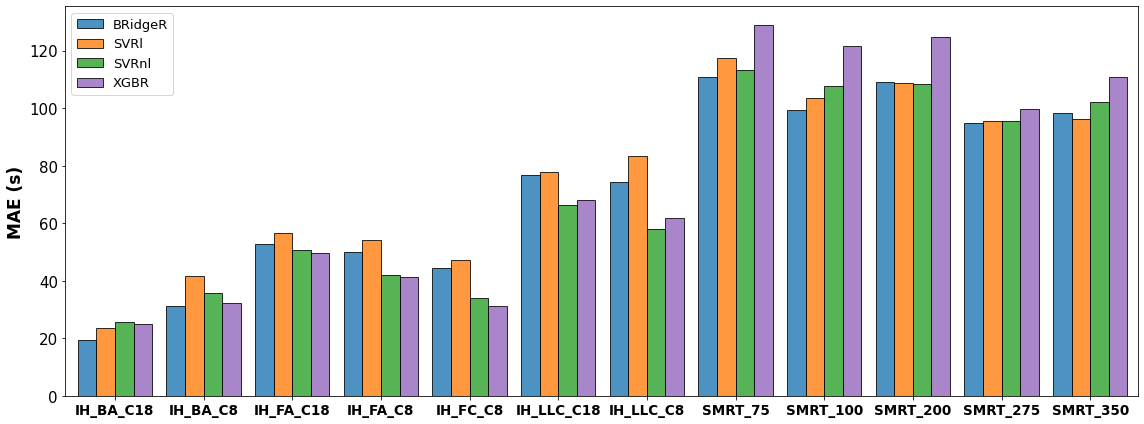

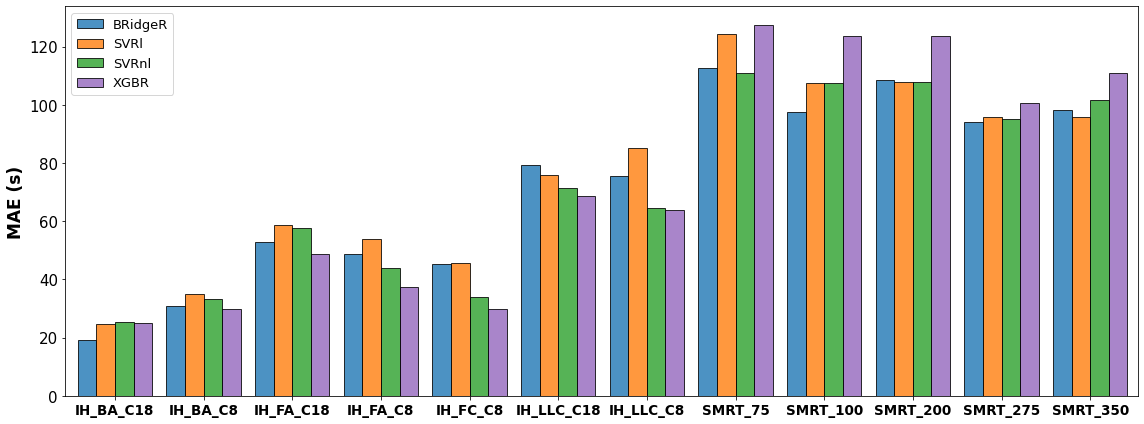

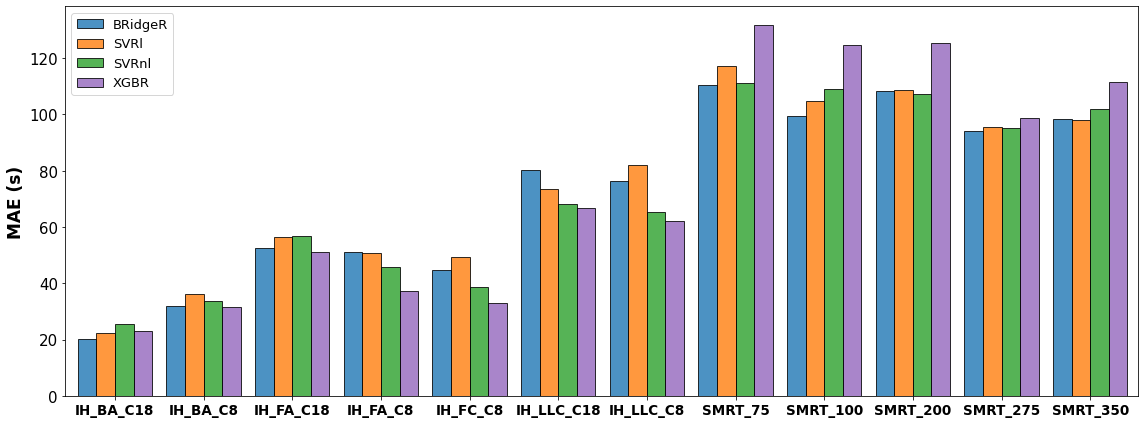

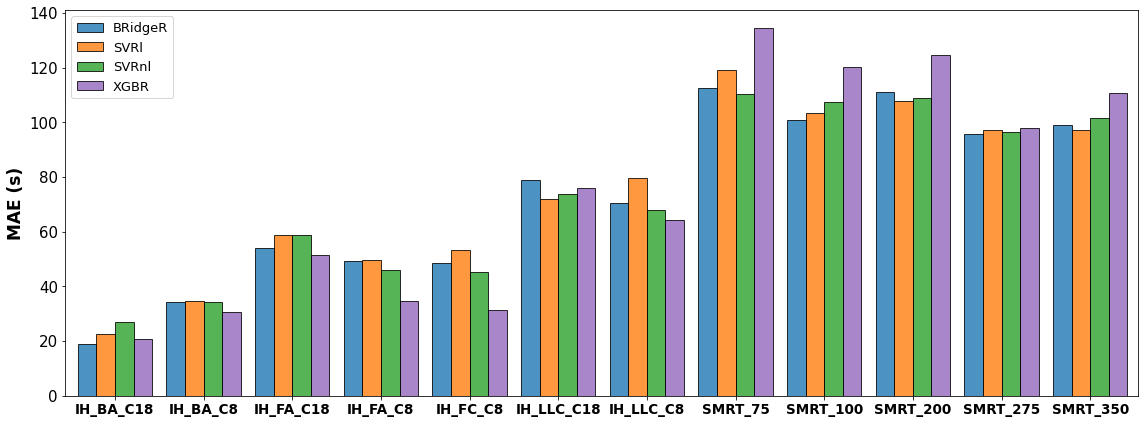

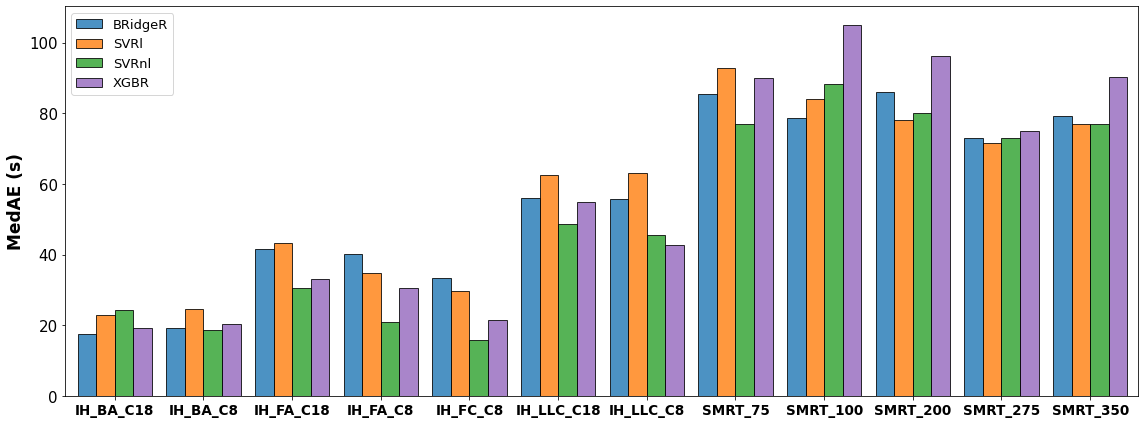

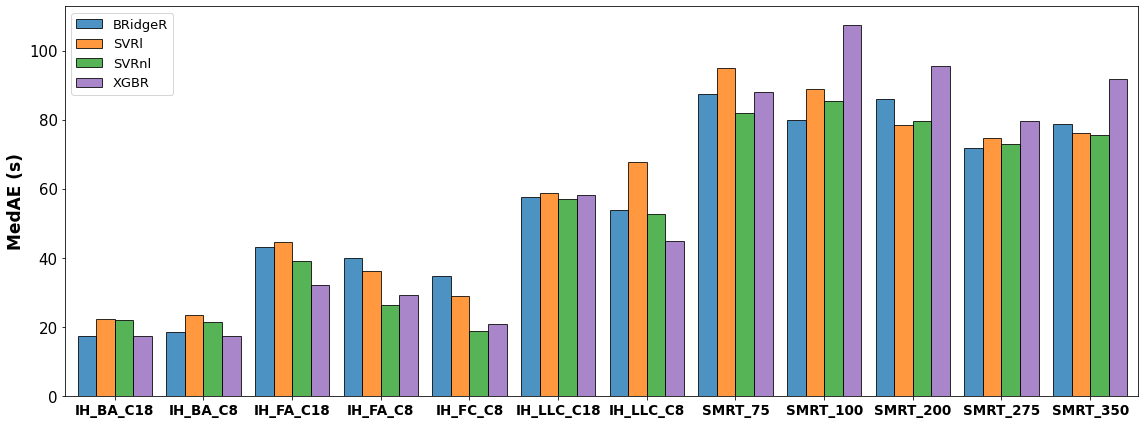

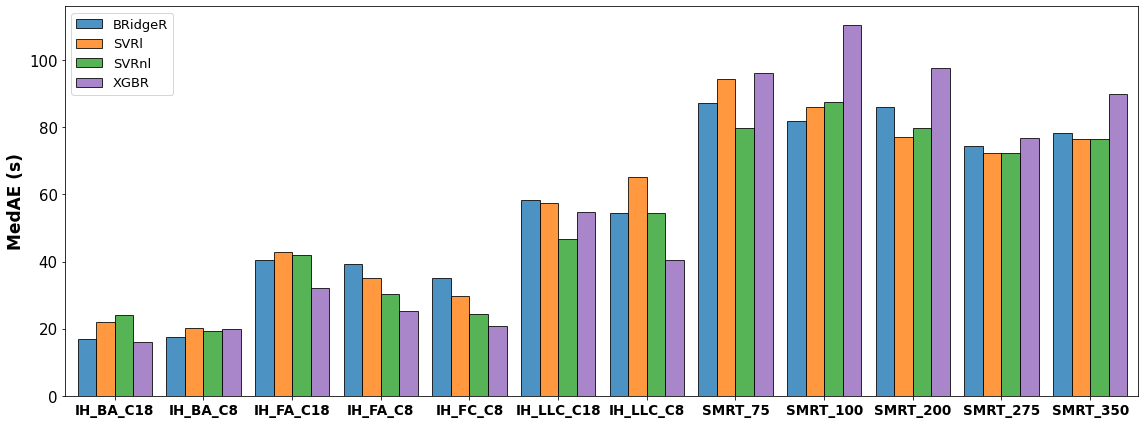

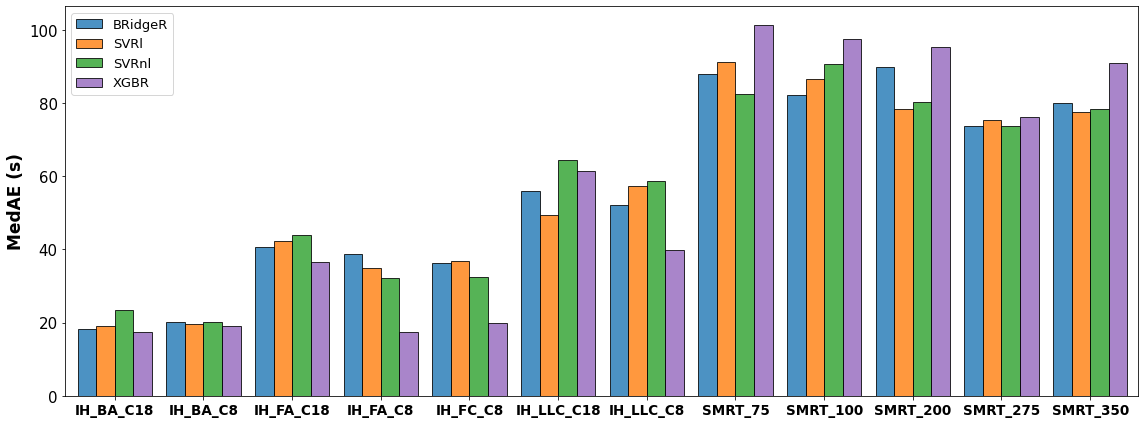

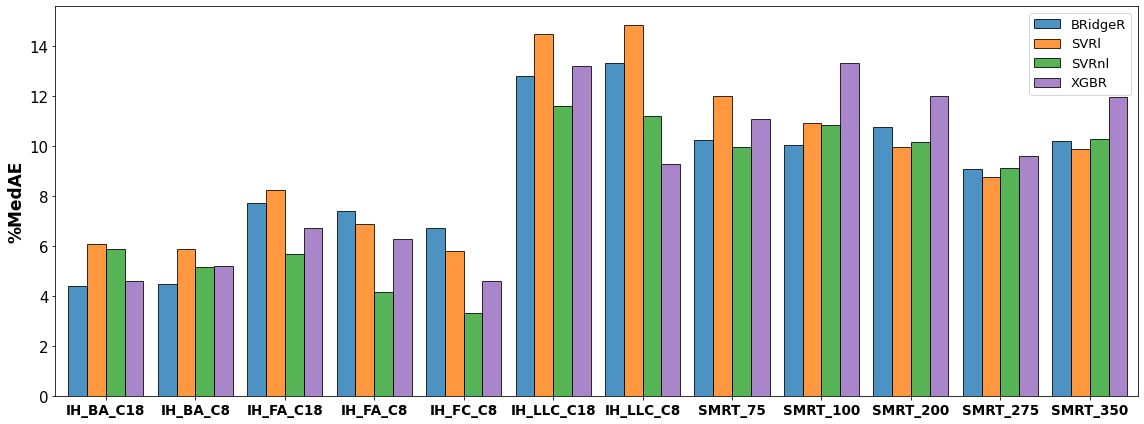

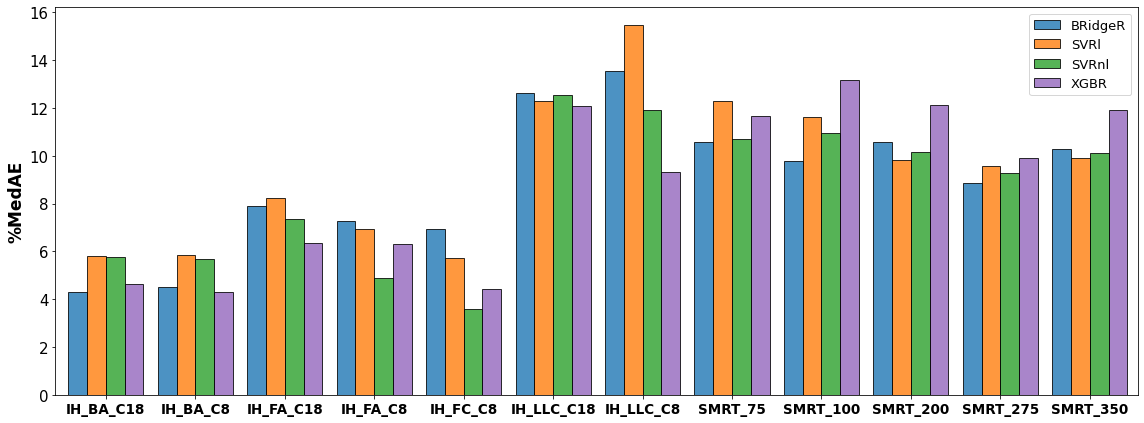

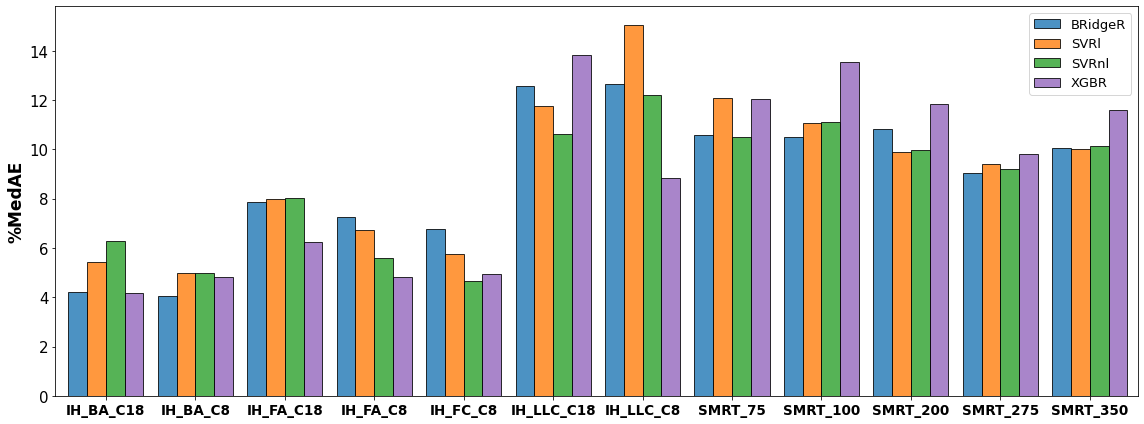

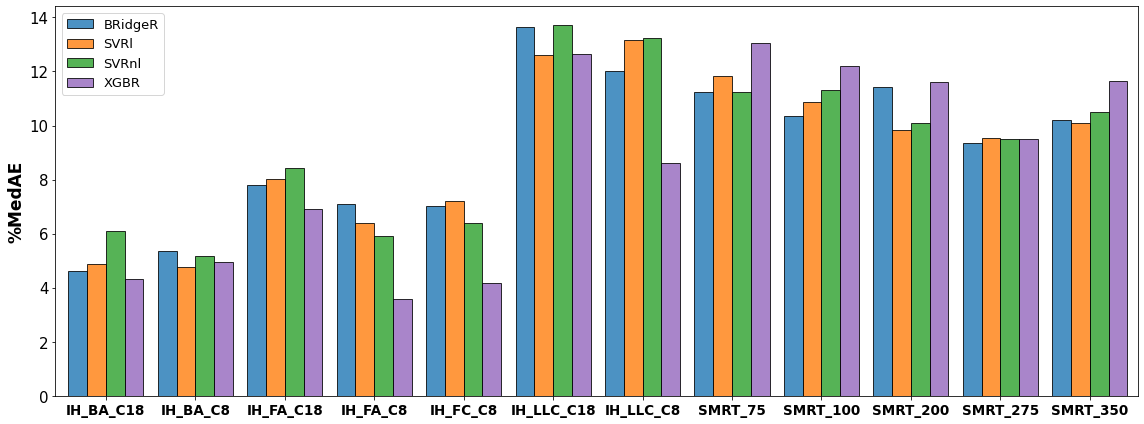

In [37]:
### Create Performance plots
da.comp_models_perf_matrices_plots(width=16, height=6, show_plot=True)

#### Store collected performance data to a single excel file and a separate image file for each metric-datasets' configuration combination

In [38]:
# Directory to store results
if not os.path.exists(res_mod_perf_dir):
    os.makedirs(res_mod_perf_dir)

In [39]:
# Collected performance data to single multisheet excel file
# Each sheet corresponds to a specific metric-datasets' configuration
ex_fn = 'Models_performance.xlsx'
ex_fn_lnk = os.path.join(res_mod_perf_dir, ex_fn)
da.export_dict_to_file(da.models_perf_matrices_dic, ex_fn_lnk, kl=1)

In [40]:
# Plots to individual image files
# Create a separate subdirectory
save_dir_n = 'Individual_models_performance_plots'
save_dir_lnk = os.path.join(res_mod_perf_dir, save_dir_n)
if not os.path.exists(save_dir_lnk):
    os.makedirs(save_dir_lnk)

for key in da.models_perf_plots_dic.keys():
    figure = da.models_perf_plots_dic[key]
    fig_fn = '%s_models_performance_plot.tiff' %key
    figure.savefig(os.path.join(save_dir_lnk, fig_fn), dpi=300, format='tiff', pil_kwargs={"compression": "tiff_lzw"})